**<font color="blue" size="4em">실전처럼 수행하는 프로젝트</font>** 

크롤링을 연습해보기 위해, 쉽지않을 수 있는 프로젝트를 과제로 드립니다.<br>
과제는 항상 요구사항을 꼼꼼하게 읽고, 한가지 조건이라도 빠지지 않고, 작성하시는 것이 중요합니다.<br>
또한 예외 상황에 대해서도 항상 생각을 하셔야 합니다.<br>
<br>
현실 세계의 데이터 사이언스는 정제된 데이터만을 가지고 분석하는 경우보다는<br>
정제되지 않은 데이터를 웹이든, 데이터베이스든 가지고 와서<br>
요구사항에 맞게 정제해서 사용을 합니다.<br>
<br>
크롤링은 이와 같은 데이터 수집에 가장 많이 사용되는 기술로, 기본적으로 잘 다루실 수 있어야 합니다.<br>
<br>

<font color="red" size="4em">많은 힌트를 주어 정답률을 높이기보다는, 직접 스스로 고민하시면서 작성해보셔야 늘기 때문에,<br>
고민의 과정이 힘이 드시겠지만, 반드시 스스로 고민하셔서 풀어보시기 바랍니다.</font><br>
<br>
<br>
<br>

<font color="blue" size="3em"><b>최종 제출 파일</b></font><br>
crawling_projects.ipynb<br>
<br>
<font color="blue" size="3em"><b>제출 방법</b></font><br>
crawling_projects.ipynb 각 추가과제 다음 같에 Cell을 만드셔서, 완성된 코드를 넣으시고 저장 후,<br>
<br>
이름_A.zip (A반의 경우)<br>
이름_B.zip (B반의 경우)<br>
<br>
와 같이 압축파일로 만들어, <br>
<br>
<font color="blue" size="4em"><b>dream@funcoding.xyz 이메일 주소로 전송합니다.</b></font><br>
<br>
<font color="blue" size="4em"><b>제출 기한: 10월 29일 밤12시</b></font><br>


<div class="alert alert-block alert-warning">
<font color="blue" size="3em"><b>추가 과제1: 다음 뉴스 댓글 크롤링 프로그램 개선</b></font>
http://movie.naver.com/

<font size="3em"><b>요구사항:</b></font><br>
http://v.media.daum.net/v/20170922175202762 페이지의 타이틀과 댓글 10개(추천순) 을 다음과 같이 출력하기<br>
<br>
<font size="3em"><b>출력 포멧:</b></font><br>
[각 뉴스 타이틀]<br>
1] 댓글1<br>
2] 댓글2<br>
<b>.</b><br>
<b>.</b><br>
<b>.</b><br>
10] 댓글10<br>
<br>
<font size="3em"><b>고려 사항:</b></font><br>
추천순 댓글이 10개 이하일 경우에는 댓글 갯수만큼 출력할 것<br>
<br>
<br>
<font size="3em"><b>힌트:</b></font><br>
day2_data_science_crawling.ipynb 연습문제 4번 코드를 개선하면 됩니다.

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains

import re
import requests
from bs4 import BeautifulSoup

In [4]:
import pymysql
import pandas as pd

In [5]:
chromedriver = '/Users/choigww/local/Cellar/chromedriver/chromedriver'
phantomdriver = '/Users/choigww/local/Cellar/phantomjs-2.1.1-macosx/bin/phantomjs'

In [6]:
res = requests.get('http://media.daum.net/economic/')
soup = BeautifulSoup(res.content, 'html.parser')

# a태그이면서 link_txt 속성을 갖는 경우 탐색, 리스트 타입으로 links 변수에 저장됨
links = soup.select('a.link_txt')

daum_news_pattern = r'^http[s]?://v.media.daum.net/'

In [7]:
news_link_list = []
news_dict = {}

# 일반 web-crawling으로 추출 가능한 기사 url
# '댓글 많은/ 남성 인기/ 여성 인기' 기사 및 '실시간 뉴스' 기사는 일반 크롤링을 통한 수집 불가
for link in links:

    url_into_1 = ''
    
    try:
        
        url_into_1 = re.match(daum_news_pattern + r'[\w/.a-z0-9]+', link['href']).group()
    
    except:
        
        pass
        
    if url_into_1.startswith('http://v.media.daum'):
        
        res_into = requests.get(url_into_1)
        soup_into = BeautifulSoup(res_into.content, 'html.parser')
        
        try:
            
            title_info = soup_into.select('.tit_view')[0]
            if title_info:
                
                title_del_apostrophe = title_info.get_text()\
                                        .replace('\'', '')\
                                        .replace('\"', '')\
                                        .replace('·', ',')
                
                parsed_title = re.findall(r'[0-9ㄱ-힣a-zA-Z.,!?*@&#%\[\]\s\(\)\-\+]+',\
                                       title_del_apostrophe)
                
                parsed_strings = ''
                for parsed in parsed_title:
                    parsed_strings += parsed

                print(title_del_apostrophe)
                print(parsed_strings)
                print('###')
                news_dict[parsed_strings] = [url_into_1] # comment 추가 저장을 위해 list 타입으로 value 할당
        
        except:
            pass



코스피 2600 돌파 가능할까.. 트럼프,광군제 주목
코스피 2600 돌파 가능할까.. 트럼프,광군제 주목
###
벤처 지원 훈풍에 700선 오른 코스닥..가속페달 밟을까
벤처 지원 훈풍에 700선 오른 코스닥..가속페달 밟을까
###
빚내 주식투자도 최대..신용융자잔고 첫 9조원 육박
빚내 주식투자도 최대..신용융자잔고 첫 9조원 육박
###
[코스닥 700 돌파..엇갈리는 전망] 실적 개선 가시화 vs 막연한 기대감 한계
[코스닥 700 돌파..엇갈리는 전망] 실적 개선 가시화 vs 막연한 기대감 한계
###
돈 벌려니 할 일이 없고, 공부하려니 돈 없는 20대..16%가 빚내
돈 벌려니 할 일이 없고, 공부하려니 돈 없는 20대..16%가 빚내
###
[고달픈 20대] 대학생 매월 50만원 적자..일하는 청년, 70만원 흑자
[고달픈 20대] 대학생 매월 50만원 적자..일하는 청년, 70만원 흑자
###
[고달픈 20대] 대학생 25%가 임시,일용직..대학 안 가도 20%는 백수
[고달픈 20대] 대학생 25%가 임시,일용직..대학 안 가도 20%는 백수
###
[고달픈 20대] 100명중 16명 빚냈다..그중 11%는 제때 못갚아
[고달픈 20대] 100명중 16명 빚냈다..그중 11%는 제때 못갚아
###
삼성전자, 내주 임원 인사.. 세대교체 지속, 승진 규모 촉각
삼성전자, 내주 임원 인사.. 세대교체 지속, 승진 규모 촉각
###
[주간 추천종목]반도체 가격 강세 속..삼성전자,SK하이닉스 관심
[주간 추천종목]반도체 가격 강세 속..삼성전자,SK하이닉스 관심
###
[삼성 인사 후폭풍]이재용 체제 밑그림 완성..젊고 빨라진다
[삼성 인사 후폭풍]이재용 체제 밑그림 완성..젊고 빨라진다
###
세대교체 삼성전자, 60대 임원 상당수 경영일선 퇴진할듯
세대교체 삼성전자, 60대 임원 상당수 경영일선 퇴진할듯
###
주요국 중앙銀 완화기조 속도조절?..한은 기준금리 영향은
주요국 중앙銀 완화기조 속도조절?..한은 기준금리 영향은
###
[초점]금리

홈런 치는 투수 오타니 언제 오나..몸 단 MLB 구단들
홈런 치는 투수 오타니 언제 오나..몸 단 MLB 구단들
###
이종범 코치, 국가대표 아들 이정후에게 남긴 조언
이종범 코치, 국가대표 아들 이정후에게 남긴 조언
###
[사진]이종범-이정후,만화 같은 父子 야구대표
[사진]이종범-이정후,만화 같은 父子 야구대표
###
美언론, 류현진, LAD 선발진에 깊이 제공
美언론, 류현진, LAD 선발진에 깊이 제공
###
[UFC 217] 두 체급 챔피언 GSP, 드디어 꿈이 이뤄졌다
[UFC 217] 두 체급 챔피언 GSP, 드디어 꿈이 이뤄졌다
###
[김연경 IN 상하이] 대륙에서도 펄펄 김연경, 터키 이어 중국도 정복?
[김연경 IN 상하이] 대륙에서도 펄펄 김연경, 터키 이어 중국도 정복?
###
[APBC] 캡틴 구자욱 주장직, 부담되지만 그만큼 책임감 갖겠다
[APBC] 캡틴 구자욱 주장직, 부담되지만 그만큼 책임감 갖겠다
###
세계 3대 수비형 MF 펩, 페르난지뉴 잡을 채비
세계 3대 수비형 MF 펩, 페르난지뉴 잡을 채비
###
[UFC 217] 새 챔피언 TJ 딜라쇼, 마이티 마우스의 기록은 가짜
[UFC 217] 새 챔피언 TJ 딜라쇼, 마이티 마우스의 기록은 가짜
###
선발 고민 선동열 감독 일단 함덕주는 불펜으로 기용
선발 고민 선동열 감독 일단 함덕주는 불펜으로 기용
###
보즈니아키 약혼반지는 8.8캐럿..첫 약혼 때보다 비쌀 듯
보즈니아키 약혼반지는 8.8캐럿..첫 약혼 때보다 비쌀 듯
###
신성 거포 대거 등장, 혼전 예고하는 홈런 레이스
신성 거포 대거 등장, 혼전 예고하는 홈런 레이스
###
세레소를 완전히 바꿨다.. 日 매체의 찬사받는 윤정환 감독
세레소를 완전히 바꿨다.. 日 매체의 찬사받는 윤정환 감독
###
파월 중도하차..국내 프로농구서 힘 못 쓰는 NBA 출신들
파월 중도하차..국내 프로농구서 힘 못 쓰는 NBA 출신들
###
美 언론 최지만, 양키스 떠나 새 소속팀 물색
美 언론 최지만, 양키스 떠나 새 소

In [139]:
news_dict

{'13억 시장 다시 열린다, 투자보따리 챙기는 기업들': ['http://v.media.daum.net/v/20171101190654550'],
 '200골 이동국, 슈틸리케 감독 말 때문에 은퇴 고민': ['http://v.media.daum.net/v/20171102140551018'],
 '2017 KIA 스토브리그의 화두는 집토끼 단속': ['http://v.media.daum.net/v/20171102153301018'],
 '4년간 변사 11만5000여건..하루 평균 78건': ['http://v.media.daum.net/v/20171030150303954'],
 'KO와 배신 다르빗슈 최악투, 씁쓸함에 잠긴 일본': ['http://v.media.daum.net/v/20171102161801149'],
 'LA 타임즈 다르빗슈, 용납할 수 없는 시작이었다 비난': ['http://v.media.daum.net/v/20171102140448976'],
 '[Hi #현장]故 김주혁 발인 엄수..이유영-1박팀 눈물의 배웅(종합)': ['http://v.media.daum.net/v/20171102110347615'],
 '[MLB 코메툰] 다저스는 왜 우승하지 못했나': ['http://v.media.daum.net/v/20171102161419952'],
 '[N1현장] 故김주혁, 발인식 엄수..이유영 눈물의 배웅': ['http://v.media.daum.net/v/20171102105839283'],
 '[Oh!쎈 초점] 이멤버 리멤버 포에버..故김주혁X1박2일, 눈물 바다': ['http://v.media.daum.net/v/20171102150726831'],
 '[Oh!쎈 초점] 협박,사기혐의 문희옥, 왜 후배를 지켜주지 않았을까': ['http://v.media.daum.net/v/20171102112922053'],
 '[Oh!쎈 현장] 故김주혁 발인, 끝까지 함께한 연인 이유영': ['http://v.media.daum.net/v/2

In [8]:
# 뉴스 기사 문자열 처리 함수의 작성.

def news_title_preprocess(title_string):
    title_no_apostrophe = title_string\
                                        .replace('\'', '')\
                                        .replace('\"', '')\
                                        .replace('·', ',')
                
    parsed_list = re.findall(r'[0-9ㄱ-힣a-zA-Z.,!?*@&#%\[\]\s\(\)\-\+]+',\
                           title_no_apostrophe)

    parsed_tot = ''
    for parsed_str in parsed_list:
        parsed_tot += parsed_str
        
    return parsed_tot


In [9]:
# 웹드라이버를 통해 접근 가능한 url 수집


driver = webdriver.PhantomJS(phantomdriver)
driver.get('http://media.daum.net/economic/')

element = WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, "div.box_g.box_popnews > div.pop_news.pop_cmt"))
)

# 댓글 많은 기사
most_rep = driver.find_elements_by_css_selector('div.pop_news.pop_cmt > ol > li > a')

# 남성 인기 기사
age_male = driver.find_elements_by_css_selector('div.pop_news.pop_age > div:nth-child(2) > ul > li > a')

# 여성 인기 기사
age_female = driver.find_elements_by_css_selector('div.pop_news.pop_age > div:nth-child(3) > ul > li > a')

# 실시간 뉴스
real = driver.find_elements_by_css_selector('div.box_g.box_realtime > ul > li > a')
real_title = driver.find_elements_by_css_selector('div.box_g.box_realtime > ul > li > div > strong > a')


# 댓글 많은/ 남성 인기/ 여성 인기 기사는 공통 structure를 가지므로
# 하나의 함수를 작성하여 공통적으로 사용한다
def get_title_and_url(elem_list):

    for news in elem_list:

        if news.text:

            try:
                # 댓글 많은 뉴스
                news_title = news.text.split('\n')[1]
            
            except:
                # 남성, 여성 인기 기사
                news_title = news.text
            
            news_url = news.get_attribute('href')
            print(news_title)
            print(news_title_preprocess(news_title))

        news_dict[news_title_preprocess(news_title)] = [news_url]  

get_title_and_url(most_rep)
get_title_and_url(age_male)
get_title_and_url(age_female)

# 실시간 뉴스의 경우 위 3개와 다른 구조를 가지므로 별도 수집
for url, title in zip(real, real_title):
    news_title = title.text
    
    print(news_title)
    print(news_title_preprocess(news_title))
    
    news_url = url.get_attribute('href')
    news_dict[news_title_preprocess(news_title)] = [news_url]
    

#print(news_dict.values())



[자막뉴스] "'홈플러스' 믿었는데"..편의점 점주들의 눈물
[자막뉴스] 홈플러스 믿었는데..편의점 점주들의 눈물
[르포]"1시간반이면 서울서 강릉 도착"..강원도 첫 KTX 타보니
[르포]1시간반이면 서울서 강릉 도착..강원도 첫 KTX 타보니
[단독]현대중공업, 해마다 술자리 사건 '곤혹'..또 성추행 논란
[단독]현대중공업, 해마다 술자리 사건 곤혹..또 성추행 논란
돈 벌려니 할 일이 없고, 공부하려니 돈 없는 20대..16%가 빚내
돈 벌려니 할 일이 없고, 공부하려니 돈 없는 20대..16%가 빚내
편의점 '예상수익' 부풀린 홈플러스, 최고액 징계
편의점 예상수익 부풀린 홈플러스, 최고액 징계
[채용비리기관 해부] 고액연봉 찔끔 낮췄다가 다시 대폭 인상
[채용비리기관 해부] 고액연봉 찔끔 낮췄다가 다시 대폭 인상
편의점 '예상수익' 부풀린 홈플러스, 최고액 징계
편의점 예상수익 부풀린 홈플러스, 최고액 징계
[이기자의 친절한 금융] 아는만큼 돌려받는 '13월의 월급'
[이기자의 친절한 금융] 아는만큼 돌려받는 13월의 월급
주행 중 車 브레이크 고장나면 어떻게 해야 할까
주행 중 車 브레이크 고장나면 어떻게 해야 할까
주식거래 하루 10조 돌파..'개미'들은 울상
주식거래 하루 10조 돌파..개미들은 울상
[빅데이터로 풀어낸 대박집] 망하기 딱 좋은 골목상권의 반전
[빅데이터로 풀어낸 대박집] 망하기 딱 좋은 골목상권의 반전
돈 벌려니 할 일이 없고, 공부하려니 돈 없는 20대..16%가 빚내
돈 벌려니 할 일이 없고, 공부하려니 돈 없는 20대..16%가 빚내
[명품의 민낯④]명품가방도 12개월 할부, 혀 내두르는 외국인들
[명품의 민낯]명품가방도 12개월 할부, 혀 내두르는 외국인들
주택담보대출 금리상승세 주춤..정부경고에 가산금리 내린 곳도
주택담보대출 금리상승세 주춤..정부경고에 가산금리 내린 곳도
성수동 카페거리에 퍼지는 '잔인한 돈 냄새'
성수동 카페거리에 퍼지는 잔인한 돈 냄새
[현장르포] "백화점문화센터, 전문학원 버금가는 강좌.. 가

In [143]:
news_dict

{'13억 시장 다시 열린다, 투자보따리 챙기는 기업들': ['http://v.media.daum.net/v/20171101190654550'],
 '200골 이동국, 슈틸리케 감독 말 때문에 은퇴 고민': ['http://v.media.daum.net/v/20171102140551018'],
 '2017 KIA 스토브리그의 화두는 집토끼 단속': ['http://v.media.daum.net/v/20171102153301018'],
 '4년간 변사 11만5000여건..하루 평균 78건': ['http://v.media.daum.net/v/20171030150303954'],
 'KO와 배신 다르빗슈 최악투, 씁쓸함에 잠긴 일본': ['http://v.media.daum.net/v/20171102161801149'],
 'LA 타임즈 다르빗슈, 용납할 수 없는 시작이었다 비난': ['http://v.media.daum.net/v/20171102140448976'],
 'LGU+, 3Q 영업익 2천141억원 1.3%..유,무선 고른 성장(종합2보)': ['http://v.media.daum.net/v/20171102173959456'],
 '[Hi #현장]故 김주혁 발인 엄수..이유영-1박팀 눈물의 배웅(종합)': ['http://v.media.daum.net/v/20171102110347615'],
 '[J report] 10월 수출 잘됐다더니 .. 반도체 빼면 8억 달러 감소': ['http://v.media.daum.net/v/20171102010044775'],
 '[MLB 코메툰] 다저스는 왜 우승하지 못했나': ['http://v.media.daum.net/v/20171102161419952'],
 '[N1현장] 故김주혁, 발인식 엄수..이유영 눈물의 배웅': ['http://v.media.daum.net/v/20171102105839283'],
 '[Oh!쎈 초점] 이멤버 리멤버 포에버..故김주혁X1박2일, 눈물 바다': ['http://v.medi

In [10]:
# 댓글 문자열 처리 함수의 작성.
def preprocess_one_comment(comment):
        try:
            parsed = re.match('[ㄱ-힣0-9a-zA-Z\s?!.,]*', comment).group(0)

        except:
            print('string not matched via re search.', comment)
            #print(comment.text)
            parsed = comment.text

        return (parsed\
                        .replace('\n', ' ')\
                        .replace('  ', ' ')\
                        .replace('   ', ' ')\
                        .replace('/', '')+'/')

def news_comment_preprocess(comments, limit=0):
    
    comment_res = ''
    
    if not limit:

        for i in range(len(comments)):
            
            comment_res += preprocess_one_comment(comments[i].text)
            
        return comment_res
        
    else:
        for i in range(limit):
            
            comment_res += preprocess_one_comment(comments[i].text)

        return comment_res

In [11]:
print(len(news_dict.keys()))
#news_dict.keys()
#news_dict.values()

134


In [12]:
# 각 기사 접근 후, PhantomJS를 이용하여 추천순으로 댓글 10개의 정보를 news_dict에 저장 (10개 미만일 경우 전체 저장)

driver = webdriver.Chrome(chromedriver)
#driver = webdriver.PhantomJS(phantomdriver)

for key, val in news_dict.items():
    
    loop = True
    count = 0
    
    driver.get(val[0])
    print(val[0])
    
    element = WebDriverWait(driver, 5).until(
        #EC.presence_of_element_located((By.ID, "div.cmt_box > div.alex_more"))
        EC.presence_of_element_located((By.CLASS_NAME, "cmt_count_box"))
    )
    
    while loop and count < 3:
        try:
            
            element = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, 'div.alex_more > a > span:nth-child(1)'))
            )
        
            more_button = driver.find_element_by_css_selector('div.alex_more > a > span:nth-child(1)')
            ActionChains(driver).click(more_button).perform()
            count += 1
        
        except:
            loop = False

    comments = driver.find_elements_by_css_selector(\
            'div.cmt_box > ul.list_comment > li > div > p')
    
    print('news title :', key)
    if len(comments) >= 10:
        
        comments_to_append = news_comment_preprocess(comments, limit=10)
        news_dict[key].append(comments_to_append)

        print(comments_to_append)
        print('#'*50)

    else:

        comments_to_append = news_comment_preprocess(comments)
        news_dict[key].append(comments_to_append)

        print(comments_to_append)
        print('#'*50)
        
    

http://v.media.daum.net/v/20171105120122504
news title : 돈 벌려니 할 일이 없고, 공부하려니 돈 없는 20대..16%가 빚내
암울하다 앞이 보이질 않다/할일 없는건 진짜 거짓말이다. 양복입고 편하게 일하고 칼퇴근 할 수있는 직장이 부족할 뿐/재벌적폐청산./요즘 대학다운 대학이 몇이나 되냐. 죄다 4년제 대학으로 승격시켜 자격도 안되는 것들이 돈벌이 눈깔들이 벌개져 4년제 대학이랍시고 만들어 놨으니 대학생다운 학생애들이 몇이나 될까. 이 나라는 자격 안되는 대학 전부 폐교 처분하고 전문대화해라. 우리나라 요즘 대학생들 수준을 보면 정말 가관이다/20대 뿐만 아니다 모든 세대가 힘들다  쉬고싶으나 돈이없고 일하고 싶으나 나이 많다고 받아주질않는다....../왜, 젊은이들이 공부에 몰두하는지 왜, 그래야만 하는지 그것부터 생각해봐야 할 것이다. 영국에서는 하수도 배관공을 서로 하려고 한다. 이유는 간단하다. 돈을 많이 주니까/부모로서 정말 답답하고... 앞으로 점점 더해질거 같아서 걱정입니다/외노자들이 하는 주6일/요즘 조 중 동 기사특징이 사회 소외자들 가난한자들 취업난 학생들 대변인들처럼 생각하고 인권변호사처럼 기사작성 내가 요즘 즐겁다 개 쓰레기들 언제 사회소외계층 생각했다고 지난 9년동안 한마디 하지않고 이명박 박근혜 똥구멍 빨아먹는 놈들이//
##################################################
http://v.media.daum.net/v/20171015101748879
news title : [이기자의 친절한 금융] 빚 권하는 모바일대출
빚... 조심합시다. 노트북때문에 200대출은 과한듯 하네요./
##################################################
http://v.media.daum.net/v/20171105102030524
news title : [Oh!쎈 초점] 내일 끝나나?..황금빛, LTE 속도감에 행복한 멀미
다른 고구

http://v.media.daum.net/v/20171105111648630
news title : 휴스턴 우승 이끈 투수 벌랜더, 모델 업턴과 이탈리아서 결혼
벌렌더가 제일 큰 승자다/업튼 가슴 맨날 만지는 진짜 부러운놈//남자들의 이상형은 처음 본 여자라지않소... 미스코리아 아내를 두고도 옆집 아줌마가 더 탐나는게 남자란 동물... 너무 부러워들 맙시다... 업튼도 결혼하는순간 가족일뿐...ㅋㅋ/다 나가주세요 혼자있고 싶네요,,,/벌랜더와 현진이가 승자네/유 윈!/다저스패전원인의 하나죠 그당시 다르빗슈아닌 벌렌더를영입했어야죠 front의자질부재에다 감독의 투수교체 시기죠 안타까워/다르빗슈 한테.... 뷔페 쿠폰 한장 줘라/완전 부러워요/
##################################################
http://v.media.daum.net/v/20171105084111875
news title : 이총리 나 닮은 둘째 손주 태어났어요 페이스북에 알려
추카드려요../총리님 축하합니다./손자들에게 적폐가없는 나라를 만들어주시길/
##################################################
http://v.media.daum.net/v/20171105070203283
news title : 세대교체 삼성전자, 60대 임원 상당수 경영일선 퇴진할듯

##################################################
http://v.media.daum.net/v/20171105145042945
news title : 더 유닛, 어쩌다 아이돌 멤버들이 리부트 대상 됐을까
일단 걸그룹은...대형 기획사 아니면 성공 가능성 거의 없다/글쎄요. . 아이돌 관심없는 제 입장에서 보면 이전에 있던 프로나 이거나 다 거기서 거기인거 같은데요. . . 어짜피 연예인 되고 싶은 애들 나와서 경연하고 스토리텔링 넣고 잡음 좀 넣고 다 똑같은거 같은데. ./심사가 물러터져서/실력이 아닌 기획사에 

http://v.media.daum.net/v/20171105053902725
news title : 주식거래 하루 10조 돌파..개미들은 울상
공매도 없애라/개미들이 주식시장 먹여 살린다 호구는 개미들, 주식하지 마라/개미들은 주식하면 쪽박찹니다 일찍그만두는것이 돈버는길. . . ./
##################################################
http://v.media.daum.net/v/20171105131623381
news title : 朴전대통령 내보낸 한국당, 서청원,최경환 출당도 가능할까
다같은 도둑놈들끼리 남는들 어떻고 쫓아낸들 무슨 의미가 있을까? 수구골통들 다함께 역사속에서 사라져야 서민들이 살아숨쉬고 대한민국의 미래가 밝아진다/쪽팔리다. 스스로 걸어나가서 503옆으로 가면 될듯./문제인대령통님 최고 재선도 부탁합니다 인재도 휼륭하고 시도하는 적폐청산 발전하는 대한민국 넘름한 모습 자랑스러워요  사랑합니다 달님/장화도 혼자 신을 줄 모르는 인간이 당대표를 하고 자빠졌으니원.../그냥 쇼죠 바당 넘들 기어들어오게 할 그림 만들어주는 쇼 도로 새누리당. 이명박그네당/웃기는 홍발정 청원이 경환이만 적폐 내보기엔 다수가 부역자들인데 발정제도 마찬가지고/홍준표 장고 끝에 악수다//자유한국당에 투표하는 이유가 박정희 박근혜 전대통령 덕분으로 당선된 경우가 많은데 제명하고 출당시켰을 경우,박전대통령을 마마라고 부르던 분 박전대통령이 불쌍하다고 말하는 분들이 자유한국당에 투표를 하는지 궁굼 하며,박정희 신화를 내세워 선출직에 당선되셨던 분들 박근혜전대통령을 헌신짝처럼 버리고 있는데,영남지역민들과 장년노년층분들 군복입고 집회에 나오는 분들 이분들이 자유한국당을 계속해서 지지하는지 정말로 궁굼 합니다.박정희전대통령 추도식에 참석했던 분들 박근혜1호당원을 출당시켰는데 어떻게 나올지 궁굼합니다.다스의주인누구겁니까?/해체하시지/
##################################################
http://v

http://v.media.daum.net/v/20171105143703721
news title : 민주당-국민의당 신경전 가열..인사,예산 국면에 파란일까
나는 안철수 이자가 MB를 비판하는 것을 한번도 본적이 없다/안철수한테 증여세 냈냐 안냈냐 물어봤는데 광분 ㅋㅋㅋ/안철수는.. MB그네 .. 왜? 한 마디 언급 없지 헌법을 농단하고.. 수 만가지 죄를 지었는데/난 홍준표보다  안철수가 더 싫다/생긴거나. 말하는 거나. 하는짓거리나 진짜 극혐오 !!/안철수 ㅋㅋㅋㅋㅋ 넌 그냥.... 할 말이 없다... ㅋㅋㅋㅋㅋ/희대의 사기꾼 쥐새끼의 영원한 애제자 초딩 극혐오 간잽이!!!!/꼭 먼저 시비쳐걸고 뭐라하면 이때다싶게 굴어ㅡ대선때부터 아주 양아치야그냥 맨날 시비쳐거릴거없나 하는것들같애/간잽이 이섹기를 보면 진짜 살인 충동을 강하게 느낀다!!!/희대의 간잽이 극혐오 간철수는 대통령병 걸린 중증 말기환자다. 50/
##################################################
http://v.media.daum.net/v/20171105085924108
news title : [리뷰IS] 다 내려놓음..사람 김보연, 삶의 굴곡 이겨낸 배우 43년史
두번 이혼하고 사업 실패하고 그러면서도 일반인들보다 더 화려하게 살고... 뭐가 자랑이라고 티비에서 포장까지 해주냐/보여지는 모습은, 빙산의 드러난 부분일뿐.../결혼 이혼 재혼 이혼 잘못은 아니지만  .. 너나 없이 레퍼토리 똑같다 보고싶지 않다/
##################################################
http://v.media.daum.net/v/20171105113331913
news title : 파월 중도하차..국내 프로농구서 힘 못 쓰는 NBA 출신들
뭔헛소냐 NBA에서 뛰었다고 다 골 밑을 지키게하냐? 그리고 평균 4점 6점 넣던 애들이 여기와서 14점 15점 넣으면 잘한거 아니냐? 그런애덜 델꼬와서 뭘 더바래./감독이 문제지.ㅋㅋㅋ 모든팀이

http://v.media.daum.net/v/20171105160103508
news title : 신의 직장 채용비리 점입가경..일상화된 비리 文정부 전면전
지지합니다.죠져주세요./이명박그네자유한국당바른당 세이들 뻔뻔하게 요즘 제일 큰소리 치고 있더라 지들이 국회 과반의석 차지하고 있으니까 ㅋㅋㅋㅋ/최순실은 죽기전에 감방에서 절대로 나올수 없어야한다/이명박근혜 정권 저게 정말 나라였었냐? 개같은 족속들!/비리로 합격한놈들은 비정규직으로 강등해라/연루된 간부들 목치고..  지난 5년 채용된자들  ..채용시험 다시봐라/취업비리한 놈들이나 관여한 놈들이나 모두 구속!/살 맛 다 떨어지네 열심히 노력하면 우주의 기운이 온다메 그거 언제 오는건데?ㅋㅋㅋㅋㅋ 다시 태어나야되나/잘하고 있슴다 제발 이대로 싸그리 청산합시다 쓰레기들/고놈  황제 취업 한  고놈부터 철저히 수사하라  허접한 학교 나온 놈이 황제 취업 하다니/
##################################################
http://v.media.daum.net/v/20171105115038195
news title : 삼성전자, 내주 임원 인사.. 세대교체 지속, 승진 규모 촉각
회장을 교체해야지/삼전 홍보글이냐??!!!/기레기님, 이러면 삼성서 얼마나 받나여? 삼성에서 월급 받니?/이 재용 총괄회장님께 강 인수 721113/경제문재앙 좀 배워라 너 불평불만할 때 이 사람은 먹거리를 제공했다 법인세30/너보다 나는 귀하다. 내가 제일 귀하다. 내가 귀한 것은 상상할 수 없다.는 W. 지구는 뮤 대륙과 아틀란티스 대륙은 지구. 내가 늙은것을언제처음/일반사원들한테나 잘대우해줘라/삼성홧팅/뺏어가기 위한 입김이 비밀리에 작용?/삼성이 배포하면 언론은 그대로 옮겨서 기사올린다! 거저먹기.../
##################################################
http://v.media.daum.net/v/20171104101306744
news title : 

http://v.media.daum.net/v/20171105073114428
news title : 美 언론, 버나디나 ML 복귀 추진..KIA 재계약 변수
요즘 필이 다시 런닝을시작햇더군 /내년에도 기아에서 뛰어주길 바래요 버나디나/버디잡아라/내가 보기엔 버나디아 에이전트 측에서 수쓰는 거라 봅니다  연봉을 대폭 향상하기 위한 전략임  메이저리그에선 별 관심 없음 나이 30대중반이고 뛴 지 3년이 넘었는데/여기서 대접받고 풍선열나게 불어대는것이 훨신나을텐데./이야 용병도 몸값 올릴려고 저리 뻥카 뛰우나 만으로 33인데 ㅋㅋ 어찌 메이저를 가노/용병은 용병일뿐. . . 어차피 평생갈수 없는법! 대책세워야지. ./우리에게는 필이 있지 ㅎ/우리에겐  필이 있다.ㅋㅋ 이미 대체용병  리스트 쫙 뽑아놨을거다...../글쎄? 1년의 기록으로 메이져에서? 메이져 저것들 얼마나 영악한데.. 적어도 충분한 검증 없이는? 일본에서 탐낸다고 하면 이해는 하는데../
##################################################
http://v.media.daum.net/v/20171105111535606
news title : 美 언론 최지만, 양키스 떠나 새 소속팀 물색
운이없어 몇게임 못뛰었지만 추신수,테임즈보다도 타율은 높네.. 한국선수중 최고의 타율이네. 팀운이 없어그렇지 솔직히 현수나 재균이보다는 훨씬 잘하는 선수다. 개구리그 kbo오면 타율,홈런왕도 경쟁할 정도라봅니다. 내년엔 팀,감독좀 잘만나면 신수정도는 활약할듯../성적이 나쁜것 같지는 않은데 잘 안풀리네../미국에 남으면 갈구단은 올것이다. 희망으로 본다./엘지 갈래?/최지만 계속 열심히 하면 기회는 온다 양키스에서 겐찬았는데 응원할게/엘지 올래/메쟈만 가면 삽질이네.한국와라 백억준다/한국오면 최소100억짜리네/황모 김모선수하고 비교하면 게오비오면 200억짜리군./1루수인게 약점이네 그냥 그대로 포수였으면 괜찮은 공격력인데.. 하지만 수비를 못하니 쩝.../
############

http://v.media.daum.net/v/20171105154810200
news title : 국민의당, 당사 이전 고심..하필 바른정당 당사 건물이 대안
철수 얼굴만 봐도 짜증난다 왜 저러고 댕길까??/이것들이 국민을 빙다리핫바지로 보나/최순실은 죽기전에 감방에서 절대로 나올수 없어야한다/망했으면 한국당보다 더 꼴보기싫어 특히 간철수 쥐 아바타!!/다스주인이돈 대줬나?/얼마나 무관심급이면 일요일날 기사 나오냐 빨리 없어져라/대선 조작당.../잡탕밥 하나 추가요.../돈없으면 천막당사 신축해라 대신 천막은 비닐대신 갑빠있게 몽골텐트로.../새로운 정치를 위해 안이 조금 쓰면 안되나요?/
##################################################
http://v.media.daum.net/v/20171105140406209
news title : 팀 쿡 아이폰X, 커피 몇 잔 값이면 산다
나도 아이폰 사용자지만 이건 좀... 말이나 말지 그냥/팀쿡 뭔 개소리냐/사기꾼..장사꾼../
##################################################
http://v.media.daum.net/v/20171105154556165
news title : 성폭행 논란 한샘 여직원 몰카 찍은 남성은 이미 구속
신입사원이란 새끼가 저런놈을 뽑은 한샘 안 봐도 어떤 꼬라지로 회사 돌아 가는지 알겠다/몰카범은 신속구속인데 성폭행범은 뭔 빽이 좋아 경찰도 이리 편의를 봐주냐???/옛날 옛적 아주 못된 도둑쥐 한마리가 아디 다스 신발을 훔쳐서 도망가다가 플란 다스 개한테 꽁지 빠지게 쫓기다가 쿠크 다스 를 발견 했는데 또 그걸 훔쳐서 처 먹다가 결국 잡혀서 잡아 먹혔다는 가슴 훈훈한 전설이 경북 포항에 전해져 내려 옵니다./
##################################################
http://v.media.daum.net/v/20171104201907085
news title : [

http://v.media.daum.net/v/20171105154341125
news title : 美 국방부, 의회에 서한 北 핵무기 완전파괴 하려면 지상군 침공 뿐
이게 미국 국방부의 입장이다. 문통은 무슨일이 있어도 전쟁은 막아라. 한반도에서의 전쟁은 남북 공멸이며 아베와 미국군수 업체만 즐겁게 할 뿐이다./니네 맘대로? 한반도에서 전쟁은 안된다 !/전쟁은 주변국에 도움 대한민국은 파멸 명심해야 한다. 전쟁을 부추기는 전원책 특히 당신같은 사람들이 명심해야 한다./전쟁이 터지지길 원하는 아베쉐키 트럼프 궁디 간질거리면서 전쟁질에 혈안 할것이다!! 한국전쟁을 핑계로 쪽빠리들은 전쟁가능국가로 갈것이고 또 대한민국은 개누리당같은 친일 쪽빠리들에 의해 나라를 유린당할것이다!! /한반도가 미국의 전쟁놀이터냐? 만일 미국이 북한을 공격하면. 핵전쟁은 불보듯 뻖0ㅏ고 한반도는 돌이킬 수 없는 처참안 상황을 맞게 될 것이다. 우린 미국의 종속국이 아니다. 미국 맘대로 한반도 침공하면 우리 국민은 미국을 향해 선전포고를 해야 ㄴ다. 지구상에서 가장 호저적이고 위협적인 나라가 바로 미국이다/이런 /천하의 미 국방부가 뭐가 아쉬워 군불만 땐다던가? 의회의 승인이 나야 총포 쏠려고 이지.랄.인가?. 이참에 대한민국 국회에도 승인받아라./중국과 러시아가 구경만 한다던 ㅉㅉㅉ 중국과 러시아가 공식적으로 수차례 말했다 북한이 공격하지 않는데 미국이 공격하면 북한 도울 것이라고 .. 그럼 결국 아작나는것은 북한과 한국 뿐이다 ㅉㅉㅉ 하여간 철없는 5만원짜리 댓글 부대같은 소리하고 있어 미국놈들도 ㅉㅉㅉㅉ/이라크전쟁과 북한을 비교하면 이전쟁은 일어날수없다 이라크같이 허허벌판에 미사일이 통했지만 북한같이 산악지대에 수천발의 미사일을 퍼부어도맨땅에 헤띵하는것이나 마잔기지다 하지만 우리남한이격어야하는 피해는 상상을할수없다 그래서 전쟁만큼은 어떠한 대가를 치루더라도 막아야한다/강남,강동, 분당 소형핵탄두  1발씩 떨어지면 2천만명 즉시사망/
###########################

In [170]:
for values in news_dict.values():
    if values[1]:
        print(len(values[1]))
        
    else:
        print(values[0])

180
461
129
326
330
158
105
3
90
462
4
105
http://v.media.daum.net/v/20171102155020721
118
185
75
http://v.media.daum.net/v/20171102161811159
http://v.media.daum.net/v/20171102153551152
99
167
154
http://v.media.daum.net/v/20171012150403855
91
http://v.media.daum.net/v/20171102163306843
http://v.media.daum.net/v/20171102160905667
191
http://v.media.daum.net/v/20171101172705041
61
117
109
61
27
49
64
87
181
141
111
55
20
88
258
158
http://v.media.daum.net/v/20171102181804615
http://v.media.daum.net/v/20171102181605556
137
100
91
50
41
117
8
51
211
120
82
111
16
59
73
71
118
257
105
73
21
80
80
66
113
30
32
101
102
126
128
109
61
128
18
18
82
72
68
121
42
95
82
176
27
76
75
12
167
36
175
107
114
200
90
95
302
43
139
92
246
137
416
42
84
46
68
106
141
154
73
30
229
144
62
84
30
150
63
106
75
59
79
99
http://v.media.daum.net/v/20171102182207679
http://v.media.daum.net/v/20171102180420280
http://v.media.daum.net/v/20171102175810105
31
http://v.media.daum.net/v/20171102175102883
http://v.med

In [281]:
db = pymysql.connect(host='127.0.0.1', port=3306, user='root', passwd='jy9442xf', db='crawling_db', charset='utf8')
cursor = db.cursor()
cursor.execute("set names utf8")

0

In [282]:
sql = '''
            DROP TABLE IF EXISTS daum_news;
            CREATE TABLE daum_news (
                   id INT UNSIGNED NOT NULL AUTO_INCREMENT,
                   title VARCHAR(50) NOT NULL,
                   link VARCHAR(50) NOT NULL,
                   comment VARCHAR(1000) NOT NULL,
                   PRIMARY KEY(id)
            ) DEFAULT CHARSET=utf8 COLLATE=utf8_bin
        '''
cursor.execute(sql)
db.commit()

In [283]:
daum_news_data = []
cols = ['title', 'url', 'comments']

for key, value in news_dict.items():
    
    try:
        sql = '''INSERT INTO daum_news (title, link, comment)
                VALUES(%s, %s, %s)'''\
                % ('"'+key+'"', '"'+value[0]+'"', '"'+value[1]+'"')

        print(sql,'\n')

    except:
        print('error occurred')
        print(key, value)
    
    cursor.execute(sql)
    db.commit()
    
    
    daum_news_row = []
    
    daum_news_row.append(key)
    daum_news_row.append(value[0])
    
    try: 
        if value[1]:
            daum_news_row.append(value[1])
    except:
        pass
   
    daum_news_data.append(daum_news_row)

INSERT INTO daum_news (title, link, comment)
                VALUES("윤곽 나온 김상조 재벌개혁..셀프개혁+실태조사 압박(종합)", "http://v.media.daum.net/v/20171102172609959", "대한민국 현 정치인중 제일 정치를 잘하는 사람! 김상조! 화이팅!/더러운 대기업 놈들 이번에 개혁이 안되면 모두 해체해 버려야 한다.  우리나라 이젠 재벌 없어도 잘된다.  이재용 감방에 있으니까 삼성 잘나가잖아.  맨날 오수 없으면 망한다드니 개건희는 뒤졌는지 소식도 없고 아들놈은 감빵이고 그래도 삼성은 더 잘나가고./") 

INSERT INTO daum_news (title, link, comment)
                VALUES("김상조 재벌개혁 충분한 시간 필요..칼춤 추듯 안해", "http://v.media.daum.net/v/20171102120753821", "김상조 화이팅... 현실에 기반하면서 꾸준한 개혁 의지 지지합니다. 조급한 입진보들의 채근에 넘어갈 필요 없습니다./강력한 대대적인 재벌개혁으로 ...!! 재벌적폐 척결은 경제발전의 첩경...!!/건설사들 좀 어떻게 해봐요..../내년 지방선거 얼마 안남았습니다/군사반란 수괴는 헌법상 총살형이다 총살로 다스려야만 법치국가의 가능성이 열린다 빨갱이 짓을 보라 땅파기 자원외교 120조 쥐바기 약30조 도적들이 해외 빼돌린 검은 머니가 1200조가 넘는다 그중 그네 순실 맹박 두화니꺼는 반드시 환수하고 군사반란수괴 및 부정선거 내란수괴는 공개처단하라  군사반란수괴는 헌법이 정하는바 총살형이다 총살하는게 촛불혁명을 완성하는 민주주의다 1980년 당시 광주시 통계연보에 의하면 8000여명 이상의 실종자가 있다 실제 전국적인 실종자는 수만명 이상으로 사료된다 촛불혁명은 적폐청산이다/민주주의 국가에서 니가뭔데. 한심한 나라./") 

INSERT INTO daum_news (title, link, comment)
    

/Users/choigww/anaconda/lib/python3.6/site-packages/pymysql/cursors.py:166: Warning: (1265, "Data truncated for column 'title' at row 1")
  result = self._query(query)


In [284]:
daum_news_df = pd.DataFrame(daum_news_data, columns=cols)
daum_news_df.head()

,title,url,comments
0,윤곽 나온 김상조 재벌개혁..셀프개혁+실태조사 압박(종합),http://v.media.daum.net/v/20171102172609959,대한민국 현 정치인중 제일 정치를 잘하는 사람! 김상조! 화이팅!/더러운 대기업 놈...
1,김상조 재벌개혁 충분한 시간 필요..칼춤 추듯 안해,http://v.media.daum.net/v/20171102120753821,김상조 화이팅... 현실에 기반하면서 꾸준한 개혁 의지 지지합니다. 조급한 입진보들...
2,재계 잘못된 기업관행 과감히 개선..정부도 달라져야,http://v.media.daum.net/v/20171102113439354,재계만 문제고 그게 다다. 니들이 제일 문제다./니들이 그동안 부패한 박정부와 상납...
3,"김상조, 재벌개혁 칼 뽑아..대기업 공익재단 전수조사할 것",http://v.media.daum.net/v/20171102103214150,기회를 줬는데도 정신못차리는 재벌에게는 채찍이 필요합니다. 충분히 시간주고 명분쌓았...
4,실마리 못찾는 파리바게뜨 제빵기사 직고용,http://v.media.daum.net/v/20171102171801682,꼼수는 그만. 일을 시키는 회사가 고용하고 책임도 지는것이 맞다./어차피 줄 돈을 ...


In [209]:
for i, comment in enumerate(daum_news_df.iloc[6].comments.split('/')[:-1]):
    print(i+1, comment)

1 파리바게뜨 어서 망해라 정직원만 써야지요 하청을 너무 많이 쓰는 기업은 망해야 합니다 제빵사분들 나오셔서 좋은 개인 빵집 만드세요 응원합니다
2 꼼수의 대가들
3 국세청도 거들어야되지 않을까요!


In [280]:
db.close()

<div class="alert alert-block alert-warning">
<font color="blue" size="3em"><b>추가 과제2: 페이스북 로그인 프로그램</b></font>

<font size="3em"><b>요구사항:</b></font><br>
Selenium 으로 http://www.facebook.com 페이지에 접속해서, 자동으로 ID와 패스워드를 넣고, 버튼을 눌러서 로그인 하는 프로그램을 만들어봅니다.
<br>
<br>
<font size="3em"><b>고려 사항:</b></font><br>
이미 로그인이 되어있을 경우는 아무런 조작을 하지 않도록 할 것
<br>
<img src="00_Images/facebook.png" />

In [8]:
driver = webdriver.Chrome(chromedriver)
login_url = 'https://www.facebook.com'

uid = 'gengapixi@gmail.com'
password = 'jy9442XF$$'

driver.get(login_url)

try:
    
    element = WebDriverWait(driver, 5).until(
        EC.presence_of_element_located((By.ID, "login_form"))
    )
    
    account_input = driver.find_element_by_id("email")
    ActionChains(driver).click(account_input).send_keys(uid).perform()
    
    password_input = driver.find_element_by_id("pass")
    ActionChains(driver).click(password_input).send_keys(password).perform()

    login_button = driver.find_element_by_id("loginbutton")
    ActionChains(driver).click(login_button).perform()
    
    try:
        element = WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((By.CLASS_NAME, "_1frb"))
        )
        print('Succesfully logged in.')
    
    except TimeoutException:
        print('Failed to log in, please check the account and password.')
    
except TimeoutException:
    print('Already logged in.')
    
    

Succesfully logged in.


<div class="alert alert-block alert-warning">
<font color="blue" size="3em"><b>추가 과제3: 네이버 영화 댓글 크롤링 프로젝트</b></font>
http://movie.naver.com/

<font size="3em"><b>요구사항:</b></font><br>
http://movie.naver.com/movie/running/current.nhn 페이지(현재 상영영화)에서 <br>
<br>
(1) 예매순 1위 ~ 5위에 해당하는 영화 각각의<br>
(2) 개봉후 평점글(140자 평)을 <br>
(3) 호감순 100개 읽어서 출력하기<br>
<br>
<font size="3em"><b>출력 포멧:</b></font><br>
[영화 이름] (호감순 140자 평)<br>
1]호감순 140자 평1<br>
2]호감순 140자 평1<br>
<b>.</b><br>
<b>.</b><br>
<b>.</b><br>
100]호감순 140자 평1<br>
<br>
<font size="3em"><b>고려 사항:</b></font><br>
140자 평이 100개 이하일 경우에는 140자 평 갯수만큼 출력할 것<br>

<font color="blue" size="4em"><b>예) 빨간색 박스에 담긴 내용을 추출하는 것입니다.</b></font>
<img src="00_Images/navermoviereview.png" />

In [308]:
import re
import requests
from bs4 import BeautifulSoup


# 상영영화 예매순 상위 5개 영화 제목 및 url 추출
res = requests.get('http://movie.naver.com/movie/running/current.nhn')
soup = BeautifulSoup(res.content, 'html.parser')
base_url = 'http://movie.naver.com/movie/bi/mi/point.nhn?code='
top5_movies_dict = {}

def has_attr_check_dt(tag):
    return tag.has_attr('data-title')

soup_movielist = soup.find_all(has_attr_check_dt)

for i, movie in enumerate(soup_movielist[:5]):
    url_len = len(movie.findChild('a')['href'])
    
    top5_movies_dict[str(i+1)+movie['data-title']] =\
        [base_url + movie.findChild('a')['href'][url_len-6:],\
         movie.findChild('a')['href'][url_len-6:]]
    
print(top5_movies_dict)

{'1토르: 라그나로크': ['http://movie.naver.com/movie/bi/mi/point.nhn?code=134898', '134898'], '2침묵': ['http://movie.naver.com/movie/bi/mi/point.nhn?code=153642', '153642'], '3부라더': ['http://movie.naver.com/movie/bi/mi/point.nhn?code=160749', '160749'], '4범죄도시': ['http://movie.naver.com/movie/bi/mi/point.nhn?code=161242', '161242'], '5너의 췌장을 먹고 싶어': ['http://movie.naver.com/movie/bi/mi/point.nhn?code=159830', '159830']}


In [309]:
driver = webdriver.PhantomJS(phantomdriver)

In [310]:
for key, value in top5_movies_dict.items():

    movie_comments = []
    
    for pagenum in range(10):
        pnum = pagenum + 1

        url = 'http://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code={}&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}'\
        .format(value[1], str(pnum))
        
        driver.get(url)
        
        comments = driver.find_elements_by_css_selector("div.score_reple > p")
        
        for comment in comments:
            
            com_str = comment.text
            
            #print(com_str)
            
            # comment의 갯수는 norm - audi - best - audi&best 순서로 많음
            # 연산 횟수 최소화를 위해 norm - audi - best 순서로 체크

            is_norm = ('BEST' not in com_str) and ('관람객' not in com_str)  
            
            if not is_norm:
                is_audi = ('BEST' not in com_str) and ('관람객' in com_str) 
                
                if not is_audi:
                    is_best = ('BEST' in com_str) and ('관람객' not in com_str)   

            if is_norm:
                movie_comments.append(com_str)
                #print('norm')
                
            elif is_audi:
                movie_comments.append(com_str[3:])
                #print('is_audi')
            
            elif is_best:
                movie_comments.append(com_str[4:])
                #print('is_best')
                
            else:
                movie_comments.append(com_str[7:])
                #print('is_both')

                
    top5_movies_dict[key].append(movie_comments)

print(top5_movies_dict)
        

{'1토르: 라그나로크': ['http://movie.naver.com/movie/bi/mi/point.nhn?code=134898', '134898', ['우리는 잊고 있었다. 토르가 ‘망치’의 신이 아니고 ‘천둥’의 신이라는걸.', '시빌워에 자기들 안 불러서 삐진 그뉵아저씨들의 설움 풀기', '토르 머리 짧아지니까 진짜 잘생겼다는..깨알 스트레인지 멋있었고 전체적으로 재밌었어요 마블영화는 개봉첫날 바로 봐줘야 제맛이죠', '우리 로키가 변했어요ㅋㅋ 영화도 영화지만 이번 ost 정말 잘 뽑았네요! 아아아~ 아/ 아아아~ 아/', '망치의 신 토르가 천둥이 신이 되어가는 영화', '감독 약 빨았네. 너무 재밌짆아!!!!ㅠㅜㅠ!!', '역시 믿고 보는 마블영화입니다!! 진짜 강추!!', '토르 시리즈의 완성작. 마블의 유머,스토리,빌런 삼박자가 매우 잘 맞은 영화', '토르가 변신하는걸 보니 타노스와의 대결이 더욱 기다려집니다...', '오늘 망치 하나 사러 간다.', '케이트블란쳇 존멋 존좋', '토르시리즈중 최고입니다 ㅎㅎ', '완벽한 신이 되었다 반쪽짜리 신이었던 토르가', '이번 토르시리즈가 역대급으로 재밌었음 스토리도 짜임성있고 뭔가 마블 세계관에중요한 역활을 하는것도 있고 마블의 다음 시리즈가 더욱 기다려집니다', '엔딩크래딧 우주선 타노스임?', '진짜 존잼이다 ㅋㅋ 토르는 무슨 신이라고??', '중후반부부터 소변마려웠는데참고 쿠키까지 다챙겨봤을정도로꿀잼!', '토르시리즈중 진짜최고임! 토르가 이렇게 강했었나 할정도로 액션잘뽑음. 가오갤 데드풀처럼 병맛분위기나고 OST가 한목함. 레드 제플린의 Immigrant Song은 정말 신의 한수였음~', '너무 좋았습니다 다음 마블작품이 더 기대됩니다', '스토리,ost 다 좋고 다음 인피니티로 연결도 굿', '헬라는 예뻤다.발키리도 예뻤다.', '2차 뛰러옴ㅋㅋ재밌음', '진짜 최곱니다 로키 너무잘생겨서 심장 멎을뻔했고 슈트 최고네여 공식 감사합니다 둘이 붙어있는 장면이 많아서 좋았어요 눈호강 완벽하게 

In [311]:
top5_movies_dict.keys()

dict_keys(['1토르: 라그나로크', '2침묵', '3부라더', '4범죄도시', '5너의 췌장을 먹고 싶어'])

In [312]:
'''
[영화 이름] (호감순 140자 평)
1]호감순 140자 평1
2]호감순 140자 평1
.
.
.
100]호감순 140자 평1
'''

# 제목 수정
for key, value in top5_movies_dict.items():
    
    revised_key = ''
        
    for c in key:
        if c not in ["'", '‘', '/', "‘", ':', '"']:
            revised_key += c
    
    print(key,'->', revised_key)
    top5_movies_dict[revised_key] = top5_movies_dict.pop(key)
    
    


1토르: 라그나로크 -> 1토르 라그나로크
3부라더 -> 3부라더
4범죄도시 -> 4범죄도시
5너의 췌장을 먹고 싶어 -> 5너의 췌장을 먹고 싶어
1토르 라그나로크 -> 1토르 라그나로크
3부라더 -> 3부라더
4범죄도시 -> 4범죄도시


In [313]:
# 제목에서도 특수문자 빼야함
# db 저장을 위해 100자평 모두를 하나의 string으로 합치기.
# 문자열 에러 방지를 위해, comment 내에 존재하는 따옴표(') 삭제.

for key, value in top5_movies_dict.items():     
    print('[{}] (호감순 140자 평)'.format(key))
    
    movie_string = ''
    
    for i, comment in enumerate(value[2]):
        
        #print('{}] {}'.format(str(i+1), comment))
        
        revised_comment = ''
        for c in comment:
            
            if c not in ["'", '‘', '/', "‘", ':', '"']:
                revised_comment += c
            
        #print(revised_comment)
        movie_string += (revised_comment+'/')  # 문자열 구분자 삽입
        
    print(movie_string)
    
    top5_movies_dict[key].append(movie_string)
    print('#'*50)


[2침묵] (호감순 140자 평)
법정스릴러를 가장한 한 남자의 드라마/최민식의 농익은 연기와 류준열의 재미있는 연기를 또 보고 싶어서라도 또 보고싶다./돈이 진심이라 말하던 남자가 다 잃고 난 뒤 비로소 깨달은 진짜 진심/마지막 장면을 보고 나서 그 여운이 가시지 않는다ㅠ/가을을 닮은 듯한 짙은 여운을 던져 주는 영화다./호흡을 길게 가도 전혀 지루하지 않음/임태산  김동명 마! 내가 마! 느그 유나랑 밥도 무꼬! 어! 요트도 타고! 할거 다했어! 마! 김동명  (부들부들)/찰나의 유희보다는 오래남는 깊은 여운을 느끼고 싶다면 추천하는 영화/긴장감 넘치는 법정 장면들이 인상적인 영화/중년의 남자가 보여주는 두가지의 사랑. 그것을 보여주는 최민식의 내공/마지막 장면들을 잊지 못할 것 같다. 여운이 남는 영화/차가운듯하지만 이상하리만치 따뜻했던 영화! 그리고 머리에 계속 맴도는 김동명ㅋㅋ/최민식 명품연기에 울고 류준열 메소드연기에 자지러지게 웃는다 아직도 웃겨 ㅎㅎ/ 스크린에서 눈을 뗄 수가 없었어요. 최민식 배우와 류준열 배우 합이 엄청 나네요. 불꽃이 팍팍 튀어요. 류준열땜에 빵빵 터졌어요ㅋㅋ 박신혜 이하늬 이수경 여캐들도 특색있고 매력적이에요. 진짜 꼭 보세요. 사람 마음을 움직이는 웰메이드 영화./최민식 연기 최고입니다/내가 선택한 사랑이 옳은건지 생각하게 만든다. 부성애 정말 무섭다. 류준열 웃기려 한거아닌데 완전웃김 ~/시사회에서 미리 만난 침묵!!! 오랜만에 빈틈없는 영화를 만났습니다~ 영화가 끝난 후...마음의 여운이 오래 가네요~^^가을에 어울리는 영화!!/최민식의 감정연기가 돋보였으며, 무거울 수 있는 분위기를 재밌게 만들어주는 동명이의 연기 역시 재밌었다!/묵직한 그 남자의 진심. 침묵하게 만드는 진실이 감동으로 마음에 가득 들어찬다. 이야기의 규모도 작고 느린데 지루하지 않고 몰입하게 만드는 밀도있는 힘이 있는 올해의 수작./몰입도 최고. 인물들 심리에 집중하니 두시간이 후딱이다/사건의 실마리를 따라가다보면 어느새 큰 퍼즐이 완성되어 있는 

In [314]:
summ = 0
for comm in top5_movies_dict['1토르 라그나로크'][2]:
    summ += len(comm)
print(summ)

4031


In [290]:
db.close()

In [315]:
db = pymysql.connect(host='127.0.0.1', port=3306, user='root', passwd='jy9442xf', db='crawling_db', charset='utf8')
cursor = db.cursor()
cursor.execute("set names utf8")

0

In [316]:
sql = '''
            DROP TABLE IF EXISTS top5_movies;
            CREATE TABLE top5_movies (
                   id INT UNSIGNED NOT NULL AUTO_INCREMENT,
                   movie_rank INT(5) NOT NULL,
                   movie_title VARCHAR(30) NOT NULL,
                   top100_comment VARCHAR(10000) NOT NULL,
                   PRIMARY KEY(id)
            ) DEFAULT CHARSET=utf8 COLLATE=utf8_bin;
        '''
cursor.execute(sql)
db.commit()

In [317]:
# 순위별 정렬을 위해 먼저 DataFrame으로 변환.

top5_movies_data = []
cols = ['movie_rank','movie_title', 'top100_comment']

for key, value in top5_movies_dict.items():
    
    top5_movies_row = []
    top5_movies_row.append(int(key[:1]))
    top5_movies_row.append(key[1:])
    top5_movies_row.append(value[3])
    
    top5_movies_data.append(top5_movies_row)

top5_movies_df = pd.DataFrame(top5_movies_data, columns=cols).sort_values(by='movie_rank')
#top5_movies_df.sort_values(by='rank')
top5_movies_df.head()

,movie_rank,movie_title,top100_comment
2,1,토르 라그나로크,우리는 잊고 있었다. 토르가 망치’의 신이 아니고 천둥’의 신이라는걸./시빌워에 자...
0,2,침묵,법정스릴러를 가장한 한 남자의 드라마/최민식의 농익은 연기와 류준열의 재미있는 연기...
3,3,부라더,대단하다대단해 지금 7시16분이다 뮤슨 조조로 아직 영화나올시간도아닌데 어떻게보고 ...
4,4,범죄도시,꼭 봐라 아랏니????/이렇게 주인공이 걱정이 안되는영화는 첨이네요../혼자야?응 ...
1,5,너의 췌장을 먹고 싶어,"이용철 평론가 ㅋㅋ 너무 심한거아니냐 거의 악플수준인데 ㅋㅋㅋ 5,6,7점사이에 1..."


In [318]:
for i in range(5):

    movie_row = top5_movies_df.iloc[i]
        
    try:
        sql = '''INSERT INTO top5_movies (movie_rank, movie_title, top100_comment)
                VALUES(%d, %s, %s)'''\
                % (int(movie_row.movie_rank), \
                   '"'+movie_row.movie_title+'"', \
                   '"'+movie_row.top100_comment+'"')

        print(sql,'\n')

    except:
        print('error occurred')
        print(movie_row)

    cursor.execute(sql)
    db.commit()
    


INSERT INTO top5_movies (movie_rank, movie_title, top100_comment)
                VALUES(1, "토르 라그나로크", "우리는 잊고 있었다. 토르가 망치’의 신이 아니고 천둥’의 신이라는걸./시빌워에 자기들 안 불러서 삐진 그뉵아저씨들의 설움 풀기/토르 머리 짧아지니까 진짜 잘생겼다는..깨알 스트레인지 멋있었고 전체적으로 재밌었어요 마블영화는 개봉첫날 바로 봐줘야 제맛이죠/우리 로키가 변했어요ㅋㅋ 영화도 영화지만 이번 ost 정말 잘 뽑았네요! 아아아~ 아 아아아~ 아/망치의 신 토르가 천둥이 신이 되어가는 영화/감독 약 빨았네. 너무 재밌짆아!!!!ㅠㅜㅠ!!/역시 믿고 보는 마블영화입니다!! 진짜 강추!!/토르 시리즈의 완성작. 마블의 유머,스토리,빌런 삼박자가 매우 잘 맞은 영화/토르가 변신하는걸 보니 타노스와의 대결이 더욱 기다려집니다.../오늘 망치 하나 사러 간다./케이트블란쳇 존멋 존좋/토르시리즈중 최고입니다 ㅎㅎ/완벽한 신이 되었다 반쪽짜리 신이었던 토르가/이번 토르시리즈가 역대급으로 재밌었음 스토리도 짜임성있고 뭔가 마블 세계관에중요한 역활을 하는것도 있고 마블의 다음 시리즈가 더욱 기다려집니다/엔딩크래딧 우주선 타노스임?/진짜 존잼이다 ㅋㅋ 토르는 무슨 신이라고??/중후반부부터 소변마려웠는데참고 쿠키까지 다챙겨봤을정도로꿀잼!/토르시리즈중 진짜최고임! 토르가 이렇게 강했었나 할정도로 액션잘뽑음. 가오갤 데드풀처럼 병맛분위기나고 OST가 한목함. 레드 제플린의 Immigrant Song은 정말 신의 한수였음~/너무 좋았습니다 다음 마블작품이 더 기대됩니다/스토리,ost 다 좋고 다음 인피니티로 연결도 굿/헬라는 예뻤다.발키리도 예뻤다./2차 뛰러옴ㅋㅋ재밌음/진짜 최곱니다 로키 너무잘생겨서 심장 멎을뻔했고 슈트 최고네여 공식 감사합니다 둘이 붙어있는 장면이 많아서 좋았어요 눈호강 완벽하게 했네요 한동안 과제에 치여살아서 힘들었는데 한번에 해결됬습니다 감사합니다 사랑합니다 토르최고 로

<div class="alert alert-block alert-warning">
<font color="blue" size="3em"><b>추가 과제4: 전국 날씨 예측 데이터 도시별, 일자(오전,오후)별 pandas DataFrame 만들고, 출력하기</b></font>
사용 데이터: http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=108

In [7]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=108'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')

cities = list()
times = list()
wfs = list()
weather_data = list()

locations = soup.find_all('location')

for location in locations:
    city = location.find('city')
    data_list = location.find_all('data')
    for data in data_list:
        weather_dates = data.find_all('tmef')
        weathers = data.find_all('wf')
        for num in range(len(weather_dates)):
            weather_date_info = weather_dates[num].text.split()

            if weather_date_info[1] == "00:00":
                weather_date_info[1] = "오전"
            else:
                weather_date_info[1] = "오후"

            weather_data.append([city.text, weather_date_info[0], weather_date_info[1], weathers[num].text])

columns = ['도시', '일자', '시간', '날씨']
weather_df = pd.DataFrame(weather_data, columns=columns)
weather_df

,도시,일자,시간,날씨
0,서울,2017-11-06,오전,구름조금
1,서울,2017-11-06,오후,구름많음
2,서울,2017-11-07,오전,구름많음
3,서울,2017-11-07,오후,구름많고 비
4,서울,2017-11-08,오전,구름많음
5,서울,2017-11-08,오후,구름조금
6,서울,2017-11-09,오전,맑음
7,서울,2017-11-09,오후,맑음
8,서울,2017-11-10,오전,구름많음
9,서울,2017-11-10,오후,구름많고 비


In [5]:
db = pymysql.connect(host='127.0.0.1', port=3306, user='root', passwd='jy9442xf', db='crawling_db', charset='utf8')
cursor = db.cursor()
cursor.execute("set names utf8")

0

In [6]:
sql = '''
            DROP TABLE IF EXISTS weather_info;
            CREATE TABLE weather_info (
                   id INT UNSIGNED NOT NULL AUTO_INCREMENT,
                   city VARCHAR(10) NOT NULL,
                   date VARCHAR(10) NOT NULL,
                   time VARCHAR(5) NOT NULL,
                   weather VARCHAR(20) NOT NULL,
                   PRIMARY KEY(id)
            ) DEFAULT CHARSET=utf8 COLLATE=utf8_bin;
        '''
cursor.execute(sql)
db.commit()

In [13]:
for i in range(len(weather_df['도시'])):

    weather_row = weather_df.iloc[i]
        
    try:
        sql = '''INSERT INTO weather_info (city, date, time, weather)
                VALUES(%s, %s, %s, %s)'''\
                % ('"'+weather_row['도시']+'"', \
                   '"'+weather_row['일자']+'"', \
                   '"'+weather_row['시간']+'"',\
                   '"'+weather_row['날씨']+'"')

        print(sql,'\n')

    except:
        print('error occurred')
        print(weather_row)

    cursor.execute(sql)
    db.commit()


INSERT INTO weather_info (city, date, time, weather)
                VALUES("서울", "2017-11-06", "오전", "구름조금") 

INSERT INTO weather_info (city, date, time, weather)
                VALUES("서울", "2017-11-06", "오후", "구름많음") 

INSERT INTO weather_info (city, date, time, weather)
                VALUES("서울", "2017-11-07", "오전", "구름많음") 

INSERT INTO weather_info (city, date, time, weather)
                VALUES("서울", "2017-11-07", "오후", "구름많고 비") 

INSERT INTO weather_info (city, date, time, weather)
                VALUES("서울", "2017-11-08", "오전", "구름많음") 

INSERT INTO weather_info (city, date, time, weather)
                VALUES("서울", "2017-11-08", "오후", "구름조금") 

INSERT INTO weather_info (city, date, time, weather)
                VALUES("서울", "2017-11-09", "오전", "맑음") 

INSERT INTO weather_info (city, date, time, weather)
                VALUES("서울", "2017-11-09", "오후", "맑음") 

INSERT INTO weather_info (city, date, time, weather)
                VALUES("서울", "2017-11-10", "오전", "구름많

In [14]:
db.close()

<div class="alert alert-block alert-warning">
<font color="blue" size="3em"><b>추가 과제5: 아파트매매 실거래자료 데이터 읽기</b></font>

 - https://www.data.go.kr/dataset/3050988/openapi.do 에서 아파트매매 실거래자료 API 권한을 신청하고,
 - 다음 지역/계약월 XML 데이터를 수신받아서, pandas DataFrame 으로 만들어 출력  
   - 지역: 서울특별시 양천구    
   - 계약월: 201708
 - pandas DataFrame 컬럼명
   <pre>
   '거래금액', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층'
   </pre>

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#servic_key = '7EXTkXr7wXAIX4yers4GCXFsR7vVhfczQjpH6U2P1hxVoiQA1%2BEBSbY7VtPZhmaj0Citb7b387rwcwj%2B9AG4tw%3D%3D'
# 제가 신청한 인증키가 재발급을 받고나서도 계속 오류가 발생하여, 강사님 키를 사용했습니다.

servic_key = "WMV3wl%2BU%2BMG%2FOYQK3Wv99q1H79wjvVwIwHEjvrDV3K4gG2h9P1%2BKiB%2FFa1QoYI0yxBpJ3sm1L0OAEam9Rp2sbw%3D%3D"
open_api = 'https://www.data.go.kr/dataset/3050988/openapi.do'

# train set / 201608 - 201708 1년 간의 은평구 아파트 매매
train_soup_items = []
locate_code = '11380'  # 서울 은평구
contract_date_start = '201608'
contract_date = ''

for i in range(13):
    if i < 5: 
        contract_date = str(int(contract_date_start)+i)
        print(contract_date)
        request_url = "http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD=" + locate_code + "&DEAL_YMD=" + contract_date + "&serviceKey=" + servic_key
        response = requests.get(request_url)
        soup = BeautifulSoup(response.content.decode('utf-8'), 'lxml')
        train_soup_items.append(soup.find_all('item'))
        
    else:
        contract_date = str(201701 + (i - 5))
        print(contract_date)
        request_url = "http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD=" + locate_code + "&DEAL_YMD=" + contract_date + "&serviceKey=" + servic_key
        response = requests.get(request_url)
        soup = BeautifulSoup(response.content.decode('utf-8'), 'lxml')
        train_soup_items.append(soup.find_all('item'))



201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708


In [11]:
for item in train_soup_items:
    print(len(item)) 
    
# 월마다 거래량이 달라진 것을 확인 / 11월-4월 < 5-10월
# 월 숫자의 크기와 거래량은 선형적이지는 않음 : 카테고리 변수로 사용하는 것이 더 좋을 것으로 판단

326
363
403
213
148
120
195
235
260
350
332
363
196


In [12]:
# test set
locate_code = '11380'  # 서울 은평구, 
contract_date = '201709'

request_url2 = "http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD=" + locate_code + "&DEAL_YMD=" + contract_date + "&serviceKey=" + servic_key
response2 = requests.get(request_url2)
soup2 = BeautifulSoup(response2.content.decode('utf-8'), 'lxml')
test_soup_item = soup2.find_all('item')

In [13]:
len(test_soup_item)

# 작년 대비 9월 대비 거래량이 50% 미만 수준
# 거래량 또한 가격에 유의미한 변수일 수 있을 것으로 보고,
# 별도 변수를 생성.

164

In [14]:
train_yangcheon_list, test_yangcheon_list = [], []

In [15]:
for items in train_soup_items:
    
    for i, item in enumerate(items):
        
        row_data = []
        
        for info in item.text.split('>')[:-1]:
            row_data.append(info)
        
        train_yangcheon_list.append(row_data)

In [16]:
for item in enumerate(test_soup_item):
    
    row_data = []
    #print(item[1].text.split('&gt'))
    #print('')
    
    for j, sp in enumerate(item[1].text.split('&gt')[0].split('>')[:-1]):
        row_data.append(sp)

    test_yangcheon_list.append(row_data)

In [17]:
colnames = ['price', 'build_year', 'year', 'sector', 'apart', 'month', 'day', 'sqm', 'sector_code', 'post_code', 'floor']            
train_df = pd.DataFrame(train_yangcheon_list, columns=colnames) #3504개
test_df = pd.DataFrame(test_yangcheon_list, columns=colnames) #147개

# 원본 확인 위한 별도의 복사본 생성
df_for_test = train_df.copy()
df_for_test2 = test_df.copy()

In [18]:
train_df.head(3)

,price,build_year,year,sector,apart,month,day,sqm,sector_code,post_code,floor
0,"37,000거래금액",2003건축년도,2016년,수색동법정동,대림한숲아파트,8월,1~10일,84.95전용면적,415-1지번,11380지역코드,3층
1,"94,700거래금액",2009건축년도,2016년,수색동법정동,수색자이 1단지아파트,8월,11~20일,205.96전용면적,75지번,11380지역코드,19층
2,"31,500거래금액",2003건축년도,2016년,수색동법정동,대림한숲아파트,8월,11~20일,59.9전용면적,415-1지번,11380지역코드,5층


### 자료형 처리 자동화 함수를 작성
* 추후 동일한 api 소스에서 데이터를 불러올 때 사용한다.

In [19]:
def refine_apartment_data_datagokr(feature):
    
    #print('original feature')
    #print(feature[:3])
    
    refined_res = []
    
    # iterable에 있는 스트링 데이터 각각에 대하여.
    for value in feature:
        
        refined = ''
        
        # day가 아닐 때.
        if '~' not in value:
            
            # '법정동', '아파트' 항목이 아닐 때
            if ('법정동' not in value) and ('아파트' not in value):
        
                # 1글자씩 읽어서 공백과 문자열을 1차로 필터링
                for c in value:

                    try:
                        temp = int(c)
                        refined += c

                    except:

                        try:
                            temp = float(c)
                            refined += c

                        # sector_code의 '-', sqm의 '.'은 살리고자 함
                        except:
                            if c == '-' or c == '.':
                                refined += c
                            pass

                # 숫자로 변환 가능하면 숫자(1.int -> 2.float), 불가능하면 문자열로.
                try:

                    temp2 = int(refined)
                    refined_res.append(temp2)

                except:

                    try: 
                        temp2 = float(refined)
                        refined_res.append(temp2)

                    except:
                        refined_res.append(refined)
        
            # '법정동', '아파트' 항목일 때.
            else:

                if '법정동' in value:
                    # 공백이 있다면 제거
                    sector_refined = ''
                    for c in value:
                        if (c!=' '):
                            sector_refined += c
                    refined_res.append(sector_refined[:-3])

                else:
                    # 공백이 있다면 제거
                    # '아파트' 문자열도 제거한다.
                    apt_refined = ''
                    for c in value:

                        if (c != ' ') and (c not in ['아','파','트']):
                            apt_refined += c

                    refined_res.append(apt_refined)
                        
        # day에 해당할 때.
        else:
            refined_res.append(int(value[-3:-1]))
            
        
    return refined_res



In [337]:
# Test - Ok.

#for col in df_for_test.columns:
#    print('###')
#    print(refine_apartment_data_datagokr(df_for_test[col])[:3])
#    print('###')   

In [20]:
for col in df_for_test.columns:
    
    train_df[col] =\
                    refine_apartment_data_datagokr(df_for_test[col])
    test_df[col] =\
                    refine_apartment_data_datagokr(df_for_test2[col])

In [339]:
train_df.head()

,price,build_year,year,sector,apart,month,day,sqm,sector_code,post_code,floor
0,37000,2003,2016,수색동,대림한숲,8,10,84.95,415-1,11380,3
1,94700,2009,2016,수색동,수색자이1단지,8,20,205.96,75,11380,19
2,31500,2003,2016,수색동,대림한숲,8,20,59.90,415-1,11380,5
3,35000,2003,2016,수색동,진흥엣세벨,8,20,57.50,416-1,11380,11
4,42000,2003,2016,수색동,대림한숲,8,20,84.95,415-1,11380,13


In [343]:
for col in test_df.columns:
    
    print(col, test_df[col].dtype)
    

price int64
build_year int64
year int64
sector object
apart object
month int64
day int64
sqm float64
sector_code object
post_code int64
floor int64


### mysql에 저장하기

In [21]:
db = pymysql.connect(host='127.0.0.1', port=3306, user='root', passwd='jy9442xf', db='crawling_db', charset='utf8')
cursor = db.cursor()
cursor.execute("set names utf8")

0

In [22]:
sql = '''
            DROP TABLE IF EXISTS estate_eunpyeong_201708;
            CREATE TABLE estate_eunpyeong_201708 (
                   id INT UNSIGNED NOT NULL AUTO_INCREMENT,
                   price INT(10) NOT NULL,
                   build_year INT(5) NOT NULL,
                   year INT(5) NOT NULL,
                   sector VARCHAR(10) NOT NULL,
                   apart VARCHAR(20) NOT NULL,
                   month INT(5) NOT NULL,
                   day INT(5) NOT NULL,
                   sqm FLOAT(10) NOT NULL,
                   sector_code VARCHAR(20) NOT NULL,
                   post_code INT(5) NOT NULL,
                   floor INT(5) NOT NULL,
                   PRIMARY KEY(id)
            ) DEFAULT CHARSET=utf8 COLLATE=utf8_bin;
        '''
cursor.execute(sql)
db.commit()

In [37]:
for idx_row in range(len(train_df.price)):
    
    row = train_df.iloc[idx_row]
    
    # price, build_year, year, sector, apart, month, day, sqm, sector_code
    # post_code, floor
    
    
    sql = '''
        INSERT INTO estate_eunpyeong_201708 
            (price, build_year, year, sector, apart, month, day, sqm, sector_code, 
            post_code, floor)
        VALUES 
            (%d, '%d', '%d', '%s', '%s', '%d', '%d', '%f', '%s', '%d', '%d') 
    ''' % (row.price, row.build_year, row.year, row.sector, row.apart,\
          row.month, row.day, row.sqm, row.sector_code,\
          row.post_code, row.floor)
    #print(sql)
    
    cursor.execute(sql)
    db.commit()
    
    

In [38]:
db.close()

# Simple Linear Regression Model
* 2017년 은평구의 아파트 매매자료를 바탕으로 간단한 선형 모델을 만들어 본다.

### Model application
* 모델 학습에 사용할 데이터(train set) : 
  * locate_code = 11380
  * contract_date = 201608 - 201708
* 모델 테스트에 사용할 데이터(test set) : 
  * locate_code = 11380
  * contract_date = 201709

### Preprocess & feature engineering

In [475]:
train_df['price_per_sqm'] =\
                    train_df.price / train_df.sqm
    
test_df['price_per_sqm'] =\
                    test_df.price / test_df.sqm

In [476]:
train_df['yearmonth'] =\
                    train_df.year*100 + train_df.month
test_df['yearmonth'] =\
                    test_df.year*100 + test_df.month

In [477]:
from matplotlib import pyplot as plt

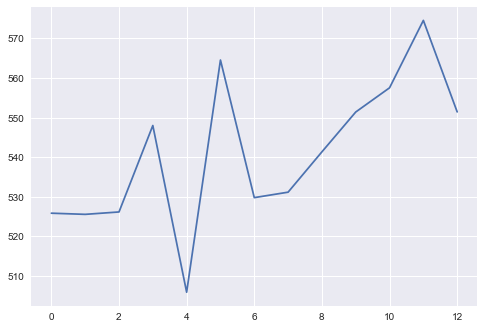

In [478]:
plt.plot(range(13), \
         train_df.groupby('yearmonth').price_per_sqm.mean())
plt.show()

In [479]:
train_df['build_age'] =\
                train_df.year -\
                train_df.build_year
        
test_df['build_age'] =\
                test_df.year -\
                test_df.build_year

In [480]:
train_df.groupby('yearmonth')['price'].count()

yearmonth
201608    326
201609    363
201610    403
201611    213
201612    148
201701    120
201702    195
201703    235
201704    260
201705    350
201706    332
201707    363
201708    196
Name: price, dtype: int64

In [481]:
train_sales = pd.Series(train_df.groupby('yearmonth')['price'].count())

In [482]:
train_df['sales_count'] = 0

In [483]:
for ym in train_df.yearmonth.unique():
    train_df['sales_count'][train_df.yearmonth == ym]\
            = train_sales.loc[ym]

/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [484]:
test_df['sales_count'] = test_df.groupby('yearmonth')['price'].count().values[0]

In [485]:
# apart의 경우, 유의미할 수 있으나 클래스가 374개로 매우 많은 편
# 374개의 더미 변수로 쪼개어 선형 모델에 적용하기에는 다소 무리가 있어 보인다.
len(train_df.apart.unique())

374

In [486]:
# 아파트별 평당 가격의 평균 top 10.
train_df.groupby('apart').price_per_sqm.mean().sort_values(ascending=False)[:10]

apart
주주베에이        996.459980
제이타워3        984.413454
응암네스         946.868825
제이타워1        916.604057
주주베B         908.850924
정익제이원(4차)    902.939923
YS홈타운        879.629630
정익제이원        871.247531
대경홈타운        870.195794
디오반          867.763288
Name: price_per_sqm, dtype: float64

In [487]:
# 평당 가격의 전체 평균으로 나눈 뒤 오름차순 정렬
train_df.groupby('apart').price_per_sqm.mean().sort_values()\
                                    / train_df.price_per_sqm.mean()

apart
무궁화                  0.416238
현재맨션                 0.485554
해오름                  0.491676
타워                   0.501912
명남빌라                 0.516828
우신                   0.518824
엘지                   0.524383
명남(200-16)           0.528467
남양구르미                0.539099
웰빙                   0.539184
현대                   0.540212
대암                   0.542681
인우(281-215)          0.546134
명성                   0.547690
역촌월드                 0.550929
청솔                   0.552475
명진(200-115)          0.554389
역촌맨션                 0.556278
역촌빌라                 0.556804
행운                   0.562796
태영홈                  0.565992
경향                   0.568009
두일                   0.570655
동익크(355-98)          0.578393
금강포란재(101)           0.581400
한름                   0.584831
동명베스(84-21)          0.591053
인우(281-236)          0.592915
대양                   0.595136
성현                   0.597973
                       ...   
은평뉴타운우물골(두산위브5단지)    1.293967
미르라이프                1.297875
북한산현

In [488]:
# (해당 아파트의 평균 평당가격 / 전체 아파트 평당 평당가격)으로 맵핑
# apart의 기존 datatype이 string(object)이므로, 새로 float형 column을 생성한다.

train_price_per_sqm_by_apart = train_df.groupby('apart').\
                                price_per_sqm.mean().sort_values()\
                                    / train_df.price_per_sqm.mean()

train_df['apartment'] = 0.0
test_df['apartment'] = 0.0
        
for apt in train_price_per_sqm_by_apart.index:
    
    train_df['apartment'][train_df.apart==apt] =\
                train_price_per_sqm_by_apart.loc[apt]
        
    # test_df에도 적용.
    if apt in test_df.apart.unique():
        test_df['apartment'][test_df.apart==apt] =\
                train_price_per_sqm_by_apart.loc[apt]
            

/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [489]:
# 아래 목록은 train set에서 거래된 적이 없는 아파트
# 실제 확인 결과 일부 아파트는 이름이 같으나 번지, 단지 숫자가 달라 다른 아파트로 판정되었음
excluded_apt = test_df.apart[test_df.apartment==0.0]
excluded_apt

9           해피플러스1
35              천지
49            한성산장
51         정익제이원6차
64             청안인
98     뉴서울(277-19)
100     뉴서울(277-2)
101       선정(35-2)
105            뉴월드
119        선정(178)
Name: apart, dtype: object

In [490]:
import numpy as np
apart_in_trainset = pd.Series(\
                refine_apartment_data_datagokr(df_for_test.apart)).unique()

In [492]:
# 앞에서 2글자가 같은 아파트 이름을 검색 후 출력
# 앞 2글자가 같은 경우를 찾지 못한 경우 법정동을 출력

for apt in excluded_apt:
    print(apt)
    
    similar = []
    
    for i, apt2 in enumerate(apart_in_trainset):
        
        if apt2.startswith(apt[:2]):
            print(apt, '-', apt2)
            similar.append(apt2)
            #test_df.apart[test_df.apart==apt] =\
            #        train_price_per_sqm_by_apart.loc[apt2]
        
        if i == (len(apart_in_trainset)-1) and len(similar) > 0:
            print(apt, '->', similar,'\n')
            break
        
    else:

        print(apt,'in the following sector:', test_df.sector[test_df.apart==apt].values,'\n')
        
        #test_df.apart[test_df.apart==apt] = np.NaN
    

해피플러스1
해피플러스1 in the following sector: ['불광동'] 

천지
천지 - 천지홈타운
천지 -> ['천지홈타운'] 

한성산장
한성산장 in the following sector: ['구산동'] 

정익제이원6차
정익제이원6차 - 정익제이원(15-114)
정익제이원6차 - 정익제이원(4차)
정익제이원6차 - 정익제이원
정익제이원6차 -> ['정익제이원(15-114)', '정익제이원(4차)', '정익제이원'] 

청안인
청안인 in the following sector: ['응암동'] 

뉴서울(277-19)
뉴서울(277-19) in the following sector: ['신사동'] 

뉴서울(277-2)
뉴서울(277-2) in the following sector: ['신사동'] 

선정(35-2)
선정(35-2) - 선정(348-12)
선정(35-2) - 선정(177)
선정(35-2) -> ['선정(348-12)', '선정(177)'] 

뉴월드
뉴월드 - 뉴월드(402-42)
뉴월드 - 뉴월드(402-112)
뉴월드 -> ['뉴월드(402-42)', '뉴월드(402-112)'] 

선정(178)
선정(178) - 선정(348-12)
선정(178) - 선정(177)
선정(178) -> ['선정(348-12)', '선정(177)'] 



In [493]:
# 해피플러스1 = 불광동 아파트 평균 평당가격 / 전체 법정동 아파트 평균 평당가격
# 한성산장 = 구산동 아파트 평균 평당가격 / 전체 법정동 아파트 평균 평당가격
# 청안인 = 응암동 아파트 평균 평당가격 / 전체 법정동 아파트 평균 평당가격
# 뉴서울(277-19, 277-2) = 신사동 아파트 평균 평당가격 / 전체 법정동 아파트 평균 평당가격

def get_average_price_per_sqm_by_sector(sectorname):
    return (train_df.groupby('sector').price.mean().loc[sectorname]/train_df.groupby('sector').price.mean().mean())

In [497]:
test_df.apartment[test_df.apart=='해피플러스1'] =\
            get_average_price_per_sqm_by_sector('불광동')
    
test_df.apartment[test_df.apart=='한성산장'] =\
            get_average_price_per_sqm_by_sector('구산동')
    
test_df.apartment[test_df.apart=='청안인'] =\
            get_average_price_per_sqm_by_sector('응암동')

test_df.apartment[test_df.apart == '뉴서울(277-19)'] =\
            get_average_price_per_sqm_by_sector('신사동')
test_df.apartment[test_df.apart == '뉴서울(277-2)'] =\
            get_average_price_per_sqm_by_sector('신사동')

불광동
1.2001286508
구산동
0.854720729513


/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


응암동
1.04410893748
신사동
0.827669067638


/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


신사동
0.827669067638


/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [498]:
# 천지 = 천지홈타운
# 정익제이원6차 = 정익제이원(4차)
# 선정(35-2) = 선정(177)
# 선정(178) = 선정(177)

train_price_per_sqm_by_apart

test_df.apartment[test_df.apart=='천지'] =\
            train_price_per_sqm_by_apart.loc['천지홈타운']
    
test_df.apartment[test_df.apart=='정익제이원6차'] =\
            train_price_per_sqm_by_apart.loc['정익제이원(4차)']

test_df.apartment[test_df.apart=='선정(35-2)'] =\
            train_price_per_sqm_by_apart.loc['선정(177)']
test_df.apartment[test_df.apart=='선정(178)'] =\
            train_price_per_sqm_by_apart.loc['선정(177)']

/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to b

In [499]:
# sector의 경우에도 최초 string 타입으로 생성됨
# 새로 int 타입의 칼럼 sector_num을 생성
# (문자열 class value를 숫자값으로 변환)

train_df['sector_num'] = 0
test_df['sector_num'] = 0

for i, cname in enumerate(test_df.sector.unique()):
    
    train_df['sector_num'][train_df.sector==cname] = i+1
    test_df['sector_num'][test_df.sector==cname] = i+1

/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/choigww/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [500]:
train_df.sector.values
train_df.sector_num.values

array([ 1,  1,  1, ..., 11, 11, 11])

In [ ]:
# 전처리 종료, trainset(201608-201708)으로 모델링 시작.

In [501]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

# correlation check and feature selection
* X features
  * (continuous) = 'sqm', 'floor', 'build_age', 'apart'
  * (category) = 'month', 'sector'
* y feature = 'price'

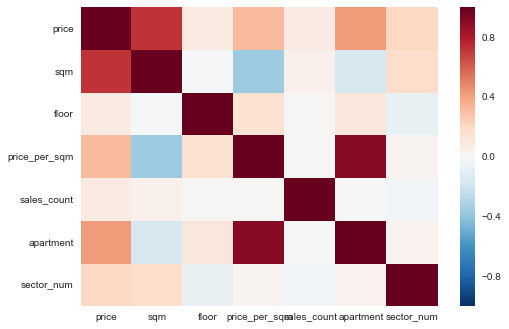

In [502]:
sns.heatmap(train_df\
            .drop(['year', 'day','post_code', 'build_year', 'build_age', 'yearmonth', 'month'],axis=1)\
            .corr())
plt.show()

In [503]:
import scipy as sp

In [504]:
def display_boxplot(df, feature):
    with plt.style.context(('seaborn-white')):
        plt.figure(figsize=(7, 5))
        sns.boxplot(x=df[feature], y=df['price'], linewidth=2, palette="Set1")
  

In [505]:
def get_unique_arr(df, feature):
    tmp_list = df[feature].unique()
    arr_list = []
    
    for i in range(len(tmp_list)):
        
        if type(tmp_list[i]) == str:
            exec("array = df['price'][df['%s'] == '%s'].values" % (feature, tmp_list[i]))
        else:
            exec("array = df['price'][df['%s'] == %d].values" % (feature, tmp_list[i]))
        exec("arr_list.append(array)")

    return arr_list

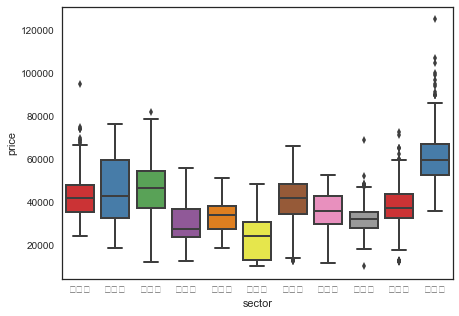

In [506]:
display_boxplot(train_df,'sector')
plt.show()

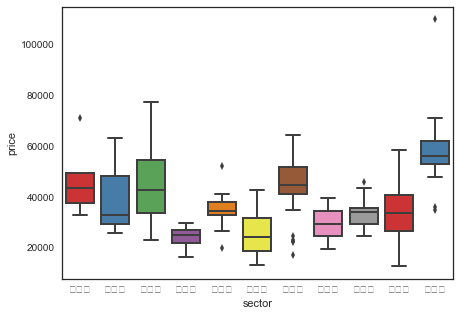

In [507]:
display_boxplot(test_df, 'sector')
plt.show()

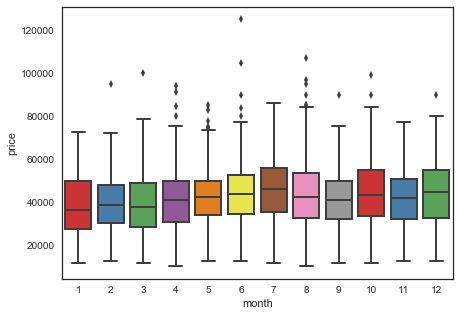

In [508]:
display_boxplot(train_df, 'month')
plt.show()

In [509]:
arr = get_unique_arr(train_df,'month')
print(len(arr))

for ar in arr:
    print(len(ar), end=' ')

print('')

# p_value < 0.05, check
print(sp.stats.f_oneway(arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6],\
                       arr[7], arr[8], arr[9], arr[10], arr[11]))

12
522 363 403 213 148 120 195 235 260 350 332 363 
F_onewayResult(statistic=6.1175688666749437, pvalue=5.0675943046770215e-10)


In [390]:
arr = get_unique_arr(train_df,'sector_num')
print(len(arr))

for ar in arr:
    print(len(ar), end=' ')

print('')

# p_value < 0.05, check
print(sp.stats.f_oneway(arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6],\
                       arr[7], arr[8], arr[9], arr[10]))

11
164 202 611 180 181 127 681 135 403 163 657 
F_onewayResult(statistic=337.12552173910984, pvalue=0.0)


In [510]:
# build_age에 0값이 있는지 갯수 체크

print(len(train_df.build_age[train_df.build_age == 0]))
print(len(test_df.build_age[test_df.build_age == 0]))

11
4


In [511]:
# build_age에 0값이 존재하여 이후 log를 취할 수 없을 수 있음
# build_age의 모든 value에 0.1을 더해준다.

train_df.build_age += 0.01
test_df.build_age += 0.01

print(len(test_df.build_age[test_df.build_age == 0]))
print(len(train_df.build_age[train_df.build_age == 0]))

0
0


# first modeling
* R-squared = 0.935 (0-1, 1일 때 예측값=실제값)
* AIC/BIC = -6578/-6417 (작을수록 좋음)
* Cond. No. = 25.9 (0-무한, 작을수록 좋음)

In [512]:
# 이상값 / NaN값 체크.
# floor 2233번째에 이상값 -1 존재 : 1의 오타로 간주하고 1로 변경
for col in train_df[['sqm', 'floor', 'apartment', 'build_age', 'sector_num', 'month']].columns:
    
    print(col)
    print(train_df[col][train_df[col]<=0])
    print(train_df[col][train_df[col].isnull()])    
    

sqm
Series([], Name: sqm, dtype: float64)
Series([], Name: sqm, dtype: float64)
floor
2233   -1
Name: floor, dtype: int64
Series([], Name: floor, dtype: int64)
apartment
Series([], Name: apartment, dtype: float64)
Series([], Name: apartment, dtype: float64)
build_age
Series([], Name: build_age, dtype: float64)
Series([], Name: build_age, dtype: float64)
sector_num
Series([], Name: sector_num, dtype: int64)
Series([], Name: sector_num, dtype: int64)
month
Series([], Name: month, dtype: int64)
Series([], Name: month, dtype: int64)


In [514]:
train_df.floor.iloc[2233] = 1

/Users/choigww/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [515]:
X0 = train_df[['sqm', 'floor', 'apartment', 'build_age', 'sector_num', 'month']]
y = train_df.price

X = sm.add_constant(X0)
model = sm.OLS.from_formula("np.log(y) ~ scale(np.log(sqm))+\
                                scale(np.log(floor))+\
                                scale(build_age)+\
                                scale(apartment)+\
                                C(month)+\
                                C(sector_num)",\
                           data=X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1998.
Date:                Sun, 29 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:43:09   Log-Likelihood:                 3314.8
No. Observations:                3504   AIC:                            -6578.
Df Residuals:                    3478   BIC:                            -6417.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.6031      0.011    941.975      0.000      10.581      10.625
C(month)[T.2]            0.0325      0.011      2.956      0.003       0.011       0.054
C(month)[T.3]            0.0162      0.011      1.518      0.129      -0.005       0.037
C(month)[T.4]            0.0294      0.010      2.810      0.005       0.009       0.050
C(month)[T.5]            0.0540      0.010      5.373      0.000       0.034       0.074
C(month)[T.6]            0.0573      0.010      5.665      0.000       0.037       0.077
C(month)[T.7]            0.0684      0.010      6.841      0.000       0.049       0.088
C(month)[T.8]            0.0142      0.010      1.477      0.140      -0.005       0.033
C(month)[T.9]            0.0087      0.010      0.867      0.386      -0.011       0.028
C(month)[T.10]           0.0081      0.010      0.822      0.411      -0.011       0.028
C(month)[T.11]           0.0231      0.011      2.135      0.033       0.002       0.044
C(month)[T.12]          -0.0178      0.012     -1.525      0.127      -0.041       0.005
C(sector_num)[T.2]      -0.0188      0.010     -1.887      0.059      -0.038       0.001
C(sector_num)[T.3]       0.0175      0.008      2.066      0.039       0.001       0.034
C(sector_num)[T.4]      -0.1165      0.011    -10.995      0.000      -0.137      -0.096
C(sector_num)[T.5]      -0.0920      0.011     -8.716      0.000      -0.113      -0.071
C(sector_num)[T.6]      -0.1815      0.012    -14.824      0.000      -0.206      -0.158
C(sector_num)[T.7]      -0.0364      0.008     -4.372      0.000      -0.053      -0.020
C(sector_num)[T.8]      -0.0797      0.011     -7.082      0.000      -0.102      -0.058
C(sector_num)[T.9]      -0.0674      0.009     -7.514      0.000      -0.085      -0.050
C(sector_num)[T.10]     -0.0348      0.010     -3.319      0.001      -0.055      -0.014
C(sector_num)[T.11]      0.0523      0.009      6.088      0.000       0.035       0.069
scale(np.log(sqm))       0.3078      0.002    142.761      0.000       0.304       0.312
scale(np.log(floor))     0.0270      0.002     16.456      0.000       0.024       0.030
scale(build_age)        -0.0303      0.002    -12.359      0.000      -0.035      -0.025
scale(apartment)         0.1781      0.003     59.382      0.000       0.172       0.184
==============================================================================
Omnibus:                      252.968   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              390.813
Skew:                          -0.573   Prob(JB):                     1.37e-85
Kurtosis:                       4.168   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Erro

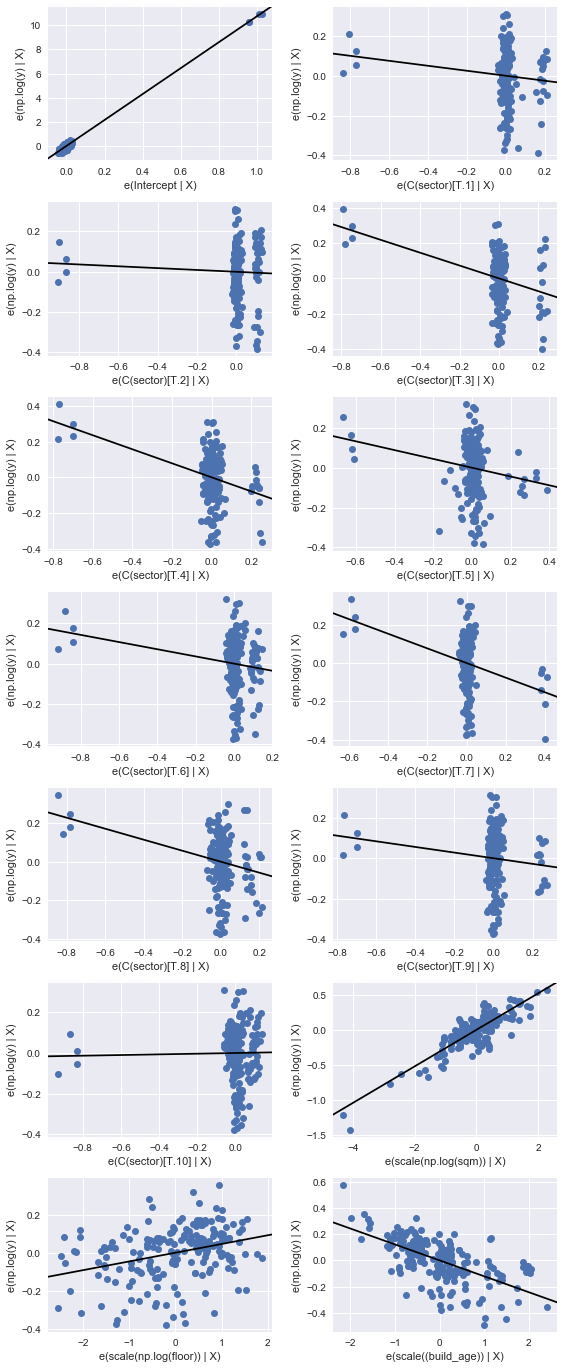

In [108]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result, fig=fig)
fig.suptitle("")
plt.show()

# second modeling
* 다중회귀모형으로부터 새로운 y 예측값을 생성

In [516]:
X0_2 = train_df[['sqm', 'floor', 'build_age', 'apartment']]
y_2 = train_df.price

X_2 = sm.add_constant(X0_2)
model2 = sm.OLS.from_formula("np.log(y_2) ~ X_2+I(X_2**2)+I(X_2**3)",\
                           data=X_2)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(y_2)   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     5090.
Date:                Sun, 29 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:44:08   Log-Likelihood:                 3639.8
No. Observations:                3504   AIC:                            -7254.
Df Residuals:                    3491   BIC:                            -7173.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.7613      0.020     88.346      0.000       1.722       1.800
X_2[0]             1.7613      0.020     88.346      0.000       1.722       1.800
X_2[1]             0.0495      0.001     54.679      0.000       0.048       0.051
X_2[2]             0.0206      0.003      7.991      0.000       0.016       0.026
X_2[3]             0.0050      0.002      3.219      0.001       0.002       0.008
X_2[4]             1.5810      0.200      7.886      0.000       1.188       1.974
I(X_2 ** 2)[0]     1.7613      0.020     88.346      0.000       1.722       1.800
I(X_2 ** 2)[1]    -0.0004   9.63e-06    -37.690      0.000      -0.000      -0.000
I(X_2 ** 2)[2]    -0.0016      0.000     -5.427      0.000      -0.002      -0.001
I(X_2 ** 2)[3]    -0.0003   8.34e-05     -3.646      0.000      -0.000      -0.000
I(X_2 ** 2)[4]     0.1366      0.194      0.704      0.481      -0.244       0.517
I(X_2 ** 3)[0]     1.7613      0.020     88.346      0.000       1.722       1.800
I(X_2 ** 3)[1]  9.683e-07   3.22e-08     30.038      0.000    9.05e-07    1.03e-06
I(X_2 ** 3)[2]  3.766e-05    9.3e-06      4.049      0.000    1.94e-05    5.59e-05
I(X_2 ** 3)[3]  3.649e-06   1.36e-06      2.685      0.007    9.84e-07    6.31e-06
I(X_2 ** 3)[4]    -0.2747      0.061     -4.530      0.000      -0.394      -0.156
==============================================================================
Omnibus:                       47.905   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.046
Skew:                           0.060   Prob(JB):                     5.62e-19
Kurtosis:                       3.749   Cond. No.                     1.43e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.98e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# third modeling
* 최초 모델의 target y value를 다중회귀모형 예측값으로 변경
* 성능의 개선을 확인.

|original model|advanced model
---|:---:|:---:
r-squared|0.935|<font color='blue'>0.970</font>
AIC|-6578|<font color='blue'>-9460</font>
BIC|-6417|<font color='blue'>-9300</font>
Cond.No.|25.9|25.9


In [517]:
X0_3 = train_df[['sqm', 'floor', 'build_age', 'apartment','sector_num','month']]
y_3 = result2.predict(X_2)

X_3 = sm.add_constant(X0)
model_3 = sm.OLS.from_formula("(y_3) ~ scale(np.log(sqm))+\
                                scale(np.log(floor))+\
                                scale(build_age)+\
                                scale(apartment)+\
                                C(month)+\
                                C(sector_num)",\
                           data=X_3)
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_3   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     4464.
Date:                Sun, 29 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:44:12   Log-Likelihood:                 4756.1
No. Observations:                3504   AIC:                            -9460.
Df Residuals:                    3478   BIC:                            -9300.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.6321      0.007   1425.176      0.000      10.618      10.647
C(month)[T.2]            0.0162      0.007      2.217      0.027       0.002       0.030
C(month)[T.3]            0.0053      0.007      0.745      0.456      -0.009       0.019
C(month)[T.4]            0.0067      0.007      0.971      0.332      -0.007       0.020
C(month)[T.5]            0.0202      0.007      3.025      0.003       0.007       0.033
C(month)[T.6]            0.0127      0.007      1.902      0.057      -0.000       0.026
C(month)[T.7]            0.0160      0.007      2.412      0.016       0.003       0.029
C(month)[T.8]            0.0129      0.006      2.022      0.043       0.000       0.025
C(month)[T.9]            0.0120      0.007      1.811      0.070      -0.001       0.025
C(month)[T.10]           0.0073      0.007      1.109      0.268      -0.006       0.020
C(month)[T.11]           0.0045      0.007      0.624      0.533      -0.010       0.019
C(month)[T.12]          -0.0043      0.008     -0.559      0.576      -0.020       0.011
C(sector_num)[T.2]      -0.0384      0.007     -5.820      0.000      -0.051      -0.025
C(sector_num)[T.3]      -0.0155      0.006     -2.763      0.006      -0.026      -0.004
C(sector_num)[T.4]      -0.0996      0.007    -14.174      0.000      -0.113      -0.086
C(sector_num)[T.5]      -0.0879      0.007    -12.554      0.000      -0.102      -0.074
C(sector_num)[T.6]      -0.1489      0.008    -18.343      0.000      -0.165      -0.133
C(sector_num)[T.7]      -0.0213      0.006     -3.853      0.000      -0.032      -0.010
C(sector_num)[T.8]      -0.0632      0.007     -8.475      0.000      -0.078      -0.049
C(sector_num)[T.9]      -0.0310      0.006     -5.224      0.000      -0.043      -0.019
C(sector_num)[T.10]     -0.0275      0.007     -3.949      0.000      -0.041      -0.014
C(sector_num)[T.11]     -0.0311      0.006     -5.467      0.000      -0.042      -0.020
scale(np.log(sqm))       0.3270      0.001    228.833      0.000       0.324       0.330
scale(np.log(floor))     0.0212      0.001     19.533      0.000       0.019       0.023
scale(build_age)        -0.0267      0.002    -16.434      0.000      -0.030      -0.023
scale(apartment)         0.2029      0.002    102.107      0.000       0.199       0.207
==============================================================================
Omnibus:                     1191.637   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5662.531
Skew:                          -1.570   Prob(JB):                         0.00
Kurtosis:                       8.378   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Erro

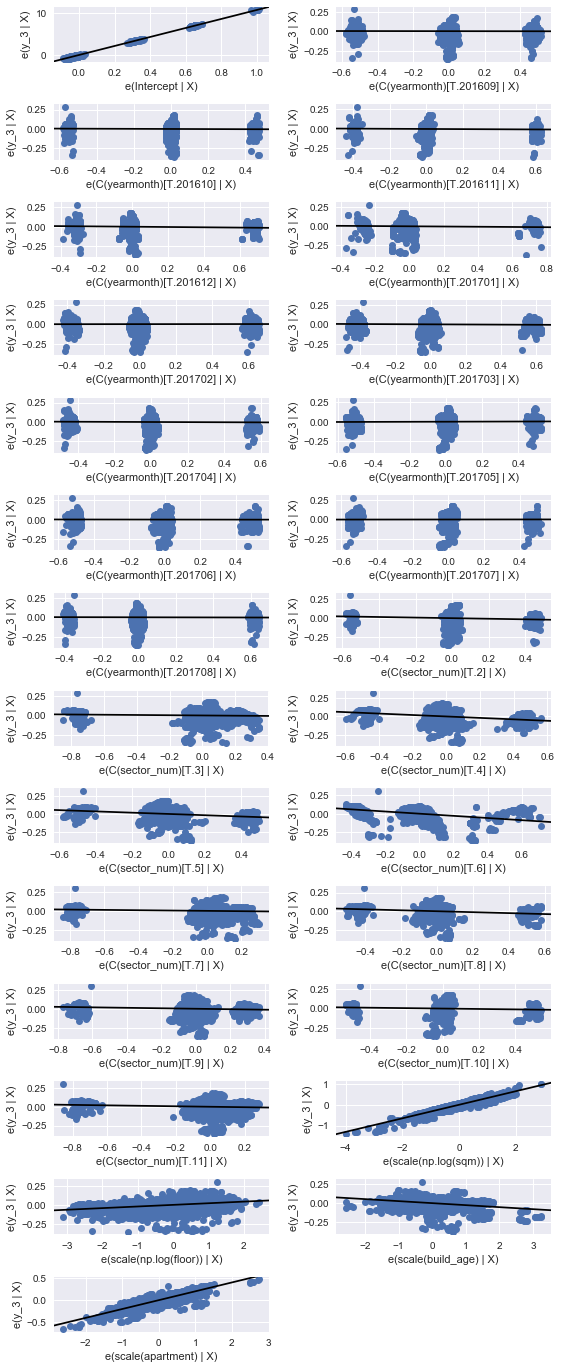

In [420]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result_3, fig=fig)
fig.suptitle("")
plt.show()

# Real price(purple) vs. Predicted (red)

In [422]:
len(train_df.price)

3504

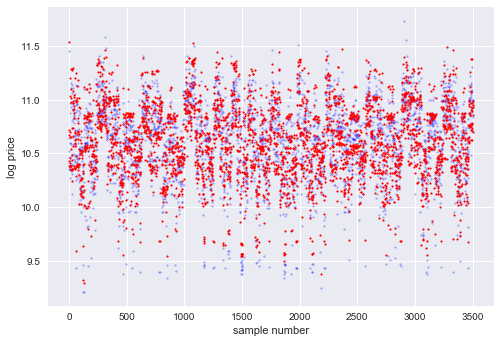

In [443]:
xx = np.linspace(0, 3504, 3504)
plt.scatter(xx,np.log(train_df.price), c='b', alpha=0.3, s=3)
plt.scatter(xx,result_3.predict(X), c='r', s=3)
plt.xlabel('sample number')
plt.ylabel('log price')
plt.show()

# Cross-validation
* train : test = 0.7 : 0.3
* perform 200 tries

In [518]:
from sklearn import cross_validation
from sklearn.model_selection import train_test_split

In [519]:
cross_val_rsquare = []
cross_val_AIC = []
cross_val_BIC = []
cross_val_CN = []

for i in range(200):

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X0, y, test_size=0.3, random_state=i)

    X_t = sm.add_constant(X_train)
    X2_t = sm.add_constant(X_train.drop(['sector_num','month'], axis=1))
    y_t = y_train
    
    X_tt = sm.add_constant(X_test)
    y_tt = y_test
    
    model_p = sm.OLS.from_formula("np.log(y_t) ~ X2_t+I(X2_t**2)+I(X2_t**3)"\
                                    , data=X2_t)
    
    result_p = model_p.fit()
    
    y_pred = result_p.predict(X_t.drop(['sector_num', 'month'], axis=1))
    
    model_t = sm.OLS.from_formula("y_pred ~ scale(np.log(sqm))+\
                                scale(np.log(floor))+\
                                scale(build_age)+\
                                scale(apartment)+\
                                C(month)+\
                                C(sector_num)",\
                                   data=X_t)
    result_t = model_t.fit()

    cross_val_rsquare.append(result_t.rsquared)
    cross_val_AIC.append(result_t.aic)
    cross_val_BIC.append(result_t.bic)
    cross_val_CN.append(result_t.condition_number)


In [520]:
print(np.mean(cross_val_rsquare))
print(np.mean(cross_val_AIC))
print(np.mean(cross_val_BIC))
print(np.mean(cross_val_CN))

0.969840248578
-6608.98623997
-6458.06509825
25.9590613865


# Rough Result from Cross Validation

|original model|advanced model|advanced_CV(200)
---|:---:|:---:|:---:
r-squared|0.935|0.970</font>|<font color='red'>0.969
AIC|-6578|-9460|<font color='red'>-6608</font>
BIC|-6417|-9300|<font color='red'>-6458</font>
Cond.No.|25.9|<font color='blue'>25.9</font>|<font color='red'>25.95</font>

* Cross validation 이전과 대비하여 모델 성능 지표의 소폭 하락이 나타남
* Cond.No.는 30 미만으로 다중공선성이 나타나지 않는 것으로 판단됨

# Predict & Conclusion


## 16.08-17.08 학습 모델로 17.09 아파트 매매가 예측
### <font color='blue'>R square = 0.952</font>

* (예측값 - 실제값 평균)의 제곱합 / (실제값 - 실제값 평균)의 제곱합이 1에 매우 가깝게 나타남
* 학습한 모델의 교차검증 성능(r2 = 0.969)과 성능차가 거의 나지 않음

In [522]:
y_201709 = test_df.price
y_201709_bar = y_201709.mean()
y_201709_hat = np.exp(result_3.predict(test_df))

SST = ((y_201709 - y_201709_bar)**2).sum()
SSReg = ((y_201709_hat - y_201709_bar)**2).sum()
R2_201709 = SSReg/SST

R2_201709

0.9521795612980225

### End of Document